In [102]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

In [103]:
df = pd.read_csv('SBIN.csv')
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-2024,EQ,737.75,759.55,736.90,733.30,752.95,752.35,750.83,793.4,501.55,"2,17,05,116","16,29,67,64,834.75","2,50,615"
1,27-Mar-2024,EQ,743.00,745.85,730.20,740.05,736.50,733.30,735.91,793.4,501.55,"3,00,88,789","22,14,26,32,347.65","3,03,834"
2,26-Mar-2024,EQ,743.05,747.85,738.50,746.70,741.80,740.05,741.15,793.4,501.55,"1,46,78,342","10,87,88,01,267.10","4,71,853"
3,22-Mar-2024,EQ,743.85,748.80,741.40,744.30,746.50,746.70,746.09,793.4,501.55,"1,55,35,921","11,59,11,96,217.50","2,61,750"
4,21-Mar-2024,EQ,742.00,750.60,740.55,736.25,742.80,744.30,745.38,793.4,501.55,"1,51,61,161","11,30,08,17,864.00","2,97,397"


In [104]:
df=df.iloc[::-1].reset_index(drop=True)

In [105]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,03-Apr-2023,EQ,524.75,528.5,522.10,523.75,525.6,526.75,525.94,629.55,430.7,"1,42,10,949","7,47,41,13,454.40","1,37,769"
1,05-Apr-2023,EQ,527.00,527.6,519.05,526.75,523.5,523.00,522.57,629.55,430.7,"1,35,74,801","7,09,38,06,223.30","1,74,172"
2,06-Apr-2023,EQ,524.00,533.7,521.65,523.00,527.7,527.65,528.66,629.55,430.7,"2,51,25,879","13,28,29,81,142.75","2,32,693"
3,10-Apr-2023,EQ,529.25,530.4,524.40,527.65,525.7,526.30,527.28,629.55,430.7,"1,73,35,453","9,14,06,93,489.70","1,38,261"
4,11-Apr-2023,EQ,530.85,535.7,527.15,526.30,532.5,532.10,533.07,629.55,430.7,"2,64,14,406","14,08,08,36,565.45","1,76,416"


In [106]:
#df=df.drop(['Date '], axis=1)
df=df.drop(['series '], axis=1)
df=df.drop(['PREV. CLOSE '], axis=1)
df=df.drop(['ltp '], axis=1)
df=df.drop(['vwap '], axis=1)
df=df.drop(['VALUE '], axis=1)
df=df.drop(['No of trades '], axis=1)

In [107]:
df['Date '] = pd.to_datetime(df['Date '])
df.set_index('Date ', inplace=True)
df.head()

,OPEN,HIGH,LOW,close,52W H,52W L,VOLUME
Date,,,,,,,
2023-04-03,524.75,528.5,522.10,526.75,629.55,430.7,"1,42,10,949"
2023-04-05,527.00,527.6,519.05,523.00,629.55,430.7,"1,35,74,801"
2023-04-06,524.00,533.7,521.65,527.65,629.55,430.7,"2,51,25,879"
2023-04-10,529.25,530.4,524.40,526.30,629.55,430.7,"1,73,35,453"
2023-04-11,530.85,535.7,527.15,532.10,629.55,430.7,"2,64,14,406"


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2023-04-03 to 2024-03-28
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OPEN     246 non-null    float64
 1   HIGH     246 non-null    float64
 2   LOW      246 non-null    float64
 3   close    246 non-null    float64
 4   52W H    246 non-null    float64
 5   52W L    246 non-null    float64
 6   VOLUME   246 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.4+ KB


In [109]:
def convert(dat):
    d=dat.replace(",","")
    d=float(d)
    return d

In [110]:
def convert_int(dat):
    d=dat.replace(",","")
    d=int(d)
    return d

In [112]:
# df['OPEN '] = df['OPEN '].apply(convert)
# df['HIGH '] = df['HIGH '].apply(convert)
# df['LOW '] = df['LOW '].apply(convert)
# df['close '] = df['close '].apply(convert)
# df['52W H '] = df['52W H '].apply(convert)
# df['52W L '] = df['52W L '].apply(convert)
df['VOLUME '] = df['VOLUME '].apply(convert_int)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2023-04-03 to 2024-03-28
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OPEN     246 non-null    float64
 1   HIGH     246 non-null    float64
 2   LOW      246 non-null    float64
 3   close    246 non-null    float64
 4   52W H    246 non-null    float64
 5   52W L    246 non-null    float64
 6   VOLUME   246 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 15.4 KB


In [114]:
df.describe()

,OPEN,HIGH,LOW,close,52W H,52W L,VOLUME
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,2.460000e+02
mean,611.891870,617.397358,606.292073,611.839228,655.197764,481.877642,1.772353e+07
std,62.507164,64.487673,61.314834,63.005558,51.584444,28.972102,8.491424e+06
min,524.000000,527.600000,519.050000,523.000000,629.550000,430.700000,1.158960e+06
25%,573.675000,576.312500,568.450000,572.875000,629.550000,466.850000,1.214840e+07
50%,588.750000,594.100000,584.600000,588.350000,629.550000,499.350000,1.553489e+07
75%,626.850000,635.350000,622.850000,627.562500,660.400000,499.350000,2.125842e+07
max,790.000000,793.400000,783.000000,788.050000,793.400000,501.550000,7.422243e+07


In [115]:
df.isnull().sum()

OPEN       0
HIGH       0
LOW        0
close      0
52W H      0
52W L      0
VOLUME     0
dtype: int64

In [116]:
df['Next_Day_Close'] = df['close '].shift(-1)

In [117]:
df.tail()

,OPEN,HIGH,LOW,close,52W H,52W L,VOLUME,Next_Day_Close
Date,,,,,,,,
2024-03-21,742.00,750.60,740.55,744.30,793.4,501.55,15161161,746.70
2024-03-22,743.85,748.80,741.40,746.70,793.4,501.55,15535921,740.05
2024-03-26,743.05,747.85,738.50,740.05,793.4,501.55,14678342,733.30
2024-03-27,743.00,745.85,730.20,733.30,793.4,501.55,30088789,752.35
2024-03-28,737.75,759.55,736.90,752.35,793.4,501.55,21705116,NaN


In [118]:
df.shape

(246, 8)

In [119]:
#df.drop([df.shape[0]-1], axis=0, inplace=True)
df = df.drop(index="2024-03-28")

In [120]:
df.tail()

,OPEN,HIGH,LOW,close,52W H,52W L,VOLUME,Next_Day_Close
Date,,,,,,,,
2024-03-20,725.15,738.95,719.80,736.25,793.4,501.55,25405455,744.30
2024-03-21,742.00,750.60,740.55,744.30,793.4,501.55,15161161,746.70
2024-03-22,743.85,748.80,741.40,746.70,793.4,501.55,15535921,740.05
2024-03-26,743.05,747.85,738.50,740.05,793.4,501.55,14678342,733.30
2024-03-27,743.00,745.85,730.20,733.30,793.4,501.55,30088789,752.35


In [121]:
train_data=df[0:int(len(df) * 0.8)]
test_data=df[int(len(df) * 0.8):]
train_ar = train_data['Next_Day_Close'].values
test_ar = test_data['Next_Day_Close'].values

In [122]:
X_train=train_data.drop(['Next_Day_Close'], axis=1)
X_test=test_data.drop(['Next_Day_Close'], axis=1)


In [123]:
X_train=np.expand_dims(X_train,axis=1)

In [124]:
X_test=np.expand_dims(X_test,axis=1)

In [125]:
y_train=train_data['Next_Day_Close']
y_test=test_data['Next_Day_Close']

In [132]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [133]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (1,X_train.shape[2],)))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(1,activation="linear"))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 50)             11600     
                                                                 
 dropout_3 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31,851
Trainable params: 31,851
Non-trainable params: 0
_________________________________________________________________


In [134]:
filepath = 'model_sbin.keras'
checkpoint = ModelCheckpoint(filepath=filepath,monitor='loss',verbose=1,save_best_only=True,mode='min')
ES = EarlyStopping(monitor='loss', patience=100)

In [135]:
history=model.fit(X_train, y_train, epochs=10000,validation_data=[X_test,y_test], callbacks = [checkpoint,ES])

Epoch 1/10000
1/7 [===>..........................] - ETA: 14s - loss: 345142.8438 - mean_absolute_error: 586.7742
Epoch 1: loss improved from inf to 344122.96875, saving model to model_sbin.keras
7/7 [==============================] - 4s 237ms/step - loss: 344122.9688 - mean_absolute_error: 586.0168 - val_loss: 517112.1250 - val_mean_absolute_error: 716.9174
Epoch 2/10000
1/7 [===>..........................] - ETA: 0s - loss: 344451.8750 - mean_absolute_error: 586.1134
Epoch 2: loss improved from 344122.96875 to 343943.75000, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 343943.7500 - mean_absolute_error: 585.8636 - val_loss: 516885.7812 - val_mean_absolute_error: 716.7596
Epoch 3/10000
1/7 [===>..........................] - ETA: 0s - loss: 335435.4375 - mean_absolute_error: 578.7312
Epoch 3: loss improved from 343943.75000 to 343748.68750, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 343748.

1/7 [===>..........................] - ETA: 0s - loss: 338435.1875 - mean_absolute_error: 581.1338
Epoch 23: loss improved from 334241.00000 to 333423.75000, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 333423.7500 - mean_absolute_error: 576.8167 - val_loss: 503626.6250 - val_mean_absolute_error: 707.4496
Epoch 24/10000
1/7 [===>..........................] - ETA: 0s - loss: 331829.8750 - mean_absolute_error: 575.4818
Epoch 24: loss improved from 333423.75000 to 332835.06250, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 332835.0625 - mean_absolute_error: 576.3016 - val_loss: 502752.9062 - val_mean_absolute_error: 706.8318
Epoch 25/10000
1/7 [===>..........................] - ETA: 0s - loss: 328820.1250 - mean_absolute_error: 572.7313
Epoch 25: loss improved from 332835.06250 to 332040.28125, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 332040.28

1/7 [===>..........................] - ETA: 0s - loss: 329909.6250 - mean_absolute_error: 573.7745
Epoch 45: loss improved from 320966.40625 to 320391.06250, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 320391.0625 - mean_absolute_error: 565.4075 - val_loss: 487682.6875 - val_mean_absolute_error: 696.0899
Epoch 46/10000
1/7 [===>..........................] - ETA: 0s - loss: 314920.7188 - mean_absolute_error: 560.5347
Epoch 46: loss improved from 320391.06250 to 319965.84375, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 319965.8438 - mean_absolute_error: 565.0270 - val_loss: 487091.7500 - val_mean_absolute_error: 695.6653
Epoch 47/10000
1/7 [===>..........................] - ETA: 0s - loss: 321868.7188 - mean_absolute_error: 566.8090
Epoch 47: loss improved from 319965.84375 to 319522.31250, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 319522.31

1/7 [===>..........................] - ETA: 0s - loss: 312787.1875 - mean_absolute_error: 558.6106
Epoch 67: loss improved from 311370.65625 to 310936.78125, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 310936.7812 - mean_absolute_error: 556.9818 - val_loss: 475976.9062 - val_mean_absolute_error: 687.6302
Epoch 68/10000
1/7 [===>..........................] - ETA: 0s - loss: 304114.3125 - mean_absolute_error: 550.9407
Epoch 68: loss improved from 310936.78125 to 310526.09375, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 310526.0938 - mean_absolute_error: 556.6139 - val_loss: 475491.0938 - val_mean_absolute_error: 687.2769
Epoch 69/10000
1/7 [===>..........................] - ETA: 0s - loss: 315991.7188 - mean_absolute_error: 561.3126
Epoch 69: loss improved from 310526.09375 to 310128.90625, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 310128.90

1/7 [===>..........................] - ETA: 0s - loss: 295392.6250 - mean_absolute_error: 543.1959
Epoch 89: loss improved from 303093.56250 to 302724.71875, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 302724.7188 - mean_absolute_error: 549.5652 - val_loss: 465863.5938 - val_mean_absolute_error: 680.2368
Epoch 90/10000
1/7 [===>..........................] - ETA: 0s - loss: 312544.7500 - mean_absolute_error: 558.2908
Epoch 90: loss improved from 302724.71875 to 302301.31250, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 302301.3125 - mean_absolute_error: 549.1734 - val_loss: 465425.4688 - val_mean_absolute_error: 679.9147
Epoch 91/10000
1/7 [===>..........................] - ETA: 0s - loss: 293029.7188 - mean_absolute_error: 540.9199
Epoch 91: loss improved from 302301.31250 to 302003.62500, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 302003.62

1/7 [===>..........................] - ETA: 0s - loss: 298646.1250 - mean_absolute_error: 545.8565
Epoch 111: loss improved from 295421.75000 to 295163.90625, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 295163.9062 - mean_absolute_error: 542.6393 - val_loss: 456541.5938 - val_mean_absolute_error: 673.3499
Epoch 112/10000
1/7 [===>..........................] - ETA: 0s - loss: 293772.9375 - mean_absolute_error: 541.3027
Epoch 112: loss improved from 295163.90625 to 294799.87500, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 294799.8750 - mean_absolute_error: 542.3030 - val_loss: 456131.1875 - val_mean_absolute_error: 673.0450
Epoch 113/10000
1/7 [===>..........................] - ETA: 0s - loss: 294985.2188 - mean_absolute_error: 542.5325
Epoch 113: loss improved from 294799.87500 to 294485.21875, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 2944

1/7 [===>..........................] - ETA: 0s - loss: 286213.0312 - mean_absolute_error: 534.5371
Epoch 133: loss improved from 288354.53125 to 288013.87500, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 288013.8750 - mean_absolute_error: 536.0074 - val_loss: 447713.6875 - val_mean_absolute_error: 666.7625
Epoch 134/10000
1/7 [===>..........................] - ETA: 0s - loss: 283741.4688 - mean_absolute_error: 531.9021
Epoch 134: loss improved from 288013.87500 to 287771.90625, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 287771.9062 - mean_absolute_error: 535.7804 - val_loss: 447321.0625 - val_mean_absolute_error: 666.4680
Epoch 135/10000
1/7 [===>..........................] - ETA: 0s - loss: 292234.7500 - mean_absolute_error: 539.9388
Epoch 135: loss improved from 287771.90625 to 287402.65625, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2874

1/7 [===>..........................] - ETA: 0s - loss: 278256.9375 - mean_absolute_error: 526.6072
Epoch 155: loss improved from 281537.31250 to 281182.71875, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 281182.7188 - mean_absolute_error: 529.5997 - val_loss: 439235.7500 - val_mean_absolute_error: 660.3743
Epoch 156/10000
1/7 [===>..........................] - ETA: 0s - loss: 288535.0000 - mean_absolute_error: 536.4686
Epoch 156: loss improved from 281182.71875 to 280860.18750, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 280860.1875 - mean_absolute_error: 529.2950 - val_loss: 438858.2812 - val_mean_absolute_error: 660.0884
Epoch 157/10000
1/7 [===>..........................] - ETA: 0s - loss: 288648.7500 - mean_absolute_error: 536.5625
Epoch 157: loss improved from 280860.18750 to 280593.31250, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2805

1/7 [===>..........................] - ETA: 0s - loss: 264263.5625 - mean_absolute_error: 513.3827
Epoch 177: loss improved from 274908.28125 to 274660.62500, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 274660.6250 - mean_absolute_error: 523.4059 - val_loss: 431030.2812 - val_mean_absolute_error: 654.1320
Epoch 178/10000
1/7 [===>..........................] - ETA: 0s - loss: 273047.8750 - mean_absolute_error: 521.7830
Epoch 178: loss improved from 274660.62500 to 274318.50000, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 274318.5000 - mean_absolute_error: 523.0775 - val_loss: 430661.5625 - val_mean_absolute_error: 653.8501
Epoch 179/10000
1/7 [===>..........................] - ETA: 0s - loss: 268825.0625 - mean_absolute_error: 517.9574
Epoch 179: loss improved from 274318.50000 to 274010.84375, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2740

1/7 [===>..........................] - ETA: 0s - loss: 271273.7500 - mean_absolute_error: 520.3047
Epoch 199: loss improved from 268512.90625 to 268221.65625, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 268221.6562 - mean_absolute_error: 517.2180 - val_loss: 423033.2500 - val_mean_absolute_error: 647.9905
Epoch 200/10000
1/7 [===>..........................] - ETA: 0s - loss: 271811.3125 - mean_absolute_error: 520.5096
Epoch 200: loss improved from 268221.65625 to 267930.21875, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 267930.2188 - mean_absolute_error: 516.9340 - val_loss: 422675.3438 - val_mean_absolute_error: 647.7143
Epoch 201/10000
1/7 [===>..........................] - ETA: 0s - loss: 263946.3125 - mean_absolute_error: 513.3351
Epoch 201: loss improved from 267930.21875 to 267620.09375, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2676

1/7 [===>..........................] - ETA: 0s - loss: 248042.1250 - mean_absolute_error: 497.6514
Epoch 221: loss improved from 262266.34375 to 261977.14062, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 261977.1406 - mean_absolute_error: 511.1469 - val_loss: 415225.5000 - val_mean_absolute_error: 641.9377
Epoch 222/10000
1/7 [===>..........................] - ETA: 0s - loss: 258714.2656 - mean_absolute_error: 508.0072
Epoch 222: loss improved from 261977.14062 to 261713.59375, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 261713.5938 - mean_absolute_error: 510.8871 - val_loss: 414875.0312 - val_mean_absolute_error: 641.6646
Epoch 223/10000
1/7 [===>..........................] - ETA: 0s - loss: 265978.5312 - mean_absolute_error: 514.9734
Epoch 223: loss improved from 261713.59375 to 261408.60938, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2614

1/7 [===>..........................] - ETA: 0s - loss: 257354.1250 - mean_absolute_error: 506.5862
Epoch 243: loss improved from 256186.84375 to 255952.34375, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 255952.3438 - mean_absolute_error: 505.2195 - val_loss: 407582.7812 - val_mean_absolute_error: 635.9570
Epoch 244/10000
1/7 [===>..........................] - ETA: 0s - loss: 259176.1250 - mean_absolute_error: 508.1227
Epoch 244: loss improved from 255952.34375 to 255629.46875, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 255629.4688 - mean_absolute_error: 504.8973 - val_loss: 407239.4375 - val_mean_absolute_error: 635.6870
Epoch 245/10000
1/7 [===>..........................] - ETA: 0s - loss: 260807.5938 - mean_absolute_error: 510.1008
Epoch 245: loss improved from 255629.46875 to 255389.85938, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2553

1/7 [===>..........................] - ETA: 0s - loss: 253007.8438 - mean_absolute_error: 502.3982
Epoch 265: loss improved from 250192.25000 to 249958.78125, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 249958.7812 - mean_absolute_error: 499.2514 - val_loss: 400079.3438 - val_mean_absolute_error: 630.0300
Epoch 266/10000
1/7 [===>..........................] - ETA: 0s - loss: 249806.1562 - mean_absolute_error: 499.1166
Epoch 266: loss improved from 249958.78125 to 249679.20312, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 249679.2031 - mean_absolute_error: 498.9716 - val_loss: 399742.0312 - val_mean_absolute_error: 629.7622
Epoch 267/10000
1/7 [===>..........................] - ETA: 0s - loss: 251194.6875 - mean_absolute_error: 500.5399
Epoch 267: loss improved from 249679.20312 to 249399.39062, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 2493

1/7 [===>..........................] - ETA: 0s - loss: 242964.7656 - mean_absolute_error: 492.3848
Epoch 287: loss improved from 244376.37500 to 244099.18750, saving model to model_sbin.keras
7/7 [==============================] - 0s 13ms/step - loss: 244099.1875 - mean_absolute_error: 493.3473 - val_loss: 392699.9062 - val_mean_absolute_error: 624.1461
Epoch 288/10000
1/7 [===>..........................] - ETA: 0s - loss: 245426.9375 - mean_absolute_error: 494.5424
Epoch 288: loss improved from 244099.18750 to 243873.87500, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 243873.8750 - mean_absolute_error: 493.1190 - val_loss: 392367.3750 - val_mean_absolute_error: 623.8797
Epoch 289/10000
1/7 [===>..........................] - ETA: 0s - loss: 251535.5312 - mean_absolute_error: 500.6567
Epoch 289: loss improved from 243873.87500 to 243567.85938, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2435

1/7 [===>..........................] - ETA: 0s - loss: 234796.7812 - mean_absolute_error: 483.6259
Epoch 309: loss improved from 238641.84375 to 238356.48438, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 238356.4844 - mean_absolute_error: 487.4934 - val_loss: 385445.1562 - val_mean_absolute_error: 618.3071
Epoch 310/10000
1/7 [===>..........................] - ETA: 0s - loss: 239933.5000 - mean_absolute_error: 489.2605
Epoch 310: loss improved from 238356.48438 to 238116.00000, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 238116.0000 - mean_absolute_error: 487.2455 - val_loss: 385117.7188 - val_mean_absolute_error: 618.0422
Epoch 311/10000
1/7 [===>..........................] - ETA: 0s - loss: 233544.8125 - mean_absolute_error: 482.7265
Epoch 311: loss improved from 238116.00000 to 237851.93750, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2378

1/7 [===>..........................] - ETA: 0s - loss: 243009.1250 - mean_absolute_error: 492.1942
Epoch 331: loss improved from 233001.12500 to 232738.20312, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 232738.2031 - mean_absolute_error: 481.6950 - val_loss: 378299.2500 - val_mean_absolute_error: 612.5012
Epoch 332/10000
1/7 [===>..........................] - ETA: 0s - loss: 229832.3594 - mean_absolute_error: 478.6769
Epoch 332: loss improved from 232738.20312 to 232481.07812, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 232481.0781 - mean_absolute_error: 481.4286 - val_loss: 377977.1562 - val_mean_absolute_error: 612.2382
Epoch 333/10000
1/7 [===>..........................] - ETA: 0s - loss: 234554.9219 - mean_absolute_error: 483.3831
Epoch 333: loss improved from 232481.07812 to 232242.45312, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2322

1/7 [===>..........................] - ETA: 0s - loss: 229746.7344 - mean_absolute_error: 478.8799
Epoch 353: loss improved from 227456.92188 to 227207.39062, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 227207.3906 - mean_absolute_error: 475.9200 - val_loss: 371256.5000 - val_mean_absolute_error: 606.7248
Epoch 354/10000
1/7 [===>..........................] - ETA: 0s - loss: 226052.4062 - mean_absolute_error: 474.5977
Epoch 354: loss improved from 227207.39062 to 226971.46875, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 226971.4688 - mean_absolute_error: 475.6726 - val_loss: 370939.0625 - val_mean_absolute_error: 606.4631
Epoch 355/10000
1/7 [===>..........................] - ETA: 0s - loss: 220616.2500 - mean_absolute_error: 469.1974
Epoch 355: loss improved from 226971.46875 to 226717.48438, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2267

1/7 [===>..........................] - ETA: 0s - loss: 220789.9219 - mean_absolute_error: 469.3532
Epoch 375: loss improved from 222034.95312 to 221764.98438, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 221764.9844 - mean_absolute_error: 470.1678 - val_loss: 364321.0938 - val_mean_absolute_error: 600.9821
Epoch 376/10000
1/7 [===>..........................] - ETA: 0s - loss: 220214.2656 - mean_absolute_error: 468.4793
Epoch 376: loss improved from 221764.98438 to 221527.54688, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 221527.5469 - mean_absolute_error: 469.9153 - val_loss: 364008.8125 - val_mean_absolute_error: 600.7222
Epoch 377/10000
1/7 [===>..........................] - ETA: 0s - loss: 225528.8438 - mean_absolute_error: 474.1458
Epoch 377: loss improved from 221527.54688 to 221282.04688, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2212

1/7 [===>..........................] - ETA: 0s - loss: 208079.0625 - mean_absolute_error: 455.6279
Epoch 397: loss improved from 216666.12500 to 216428.92188, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 216428.9219 - mean_absolute_error: 464.4591 - val_loss: 357482.2500 - val_mean_absolute_error: 595.2652
Epoch 398/10000
1/7 [===>..........................] - ETA: 0s - loss: 217359.9688 - mean_absolute_error: 465.3599
Epoch 398: loss improved from 216428.92188 to 216190.71875, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 216190.7188 - mean_absolute_error: 464.2014 - val_loss: 357171.4688 - val_mean_absolute_error: 595.0041
Epoch 399/10000
1/7 [===>..........................] - ETA: 0s - loss: 216137.5469 - mean_absolute_error: 464.3733
Epoch 399: loss improved from 216190.71875 to 215945.59375, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 21594

1/7 [===>..........................] - ETA: 0s - loss: 218330.1875 - mean_absolute_error: 466.3740
Epoch 419: loss improved from 211397.89062 to 211145.65625, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 211145.6562 - mean_absolute_error: 458.7347 - val_loss: 350723.5000 - val_mean_absolute_error: 589.5609
Epoch 420/10000
1/7 [===>..........................] - ETA: 0s - loss: 212481.8125 - mean_absolute_error: 460.1621
Epoch 420: loss improved from 211145.65625 to 210917.31250, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 210917.3125 - mean_absolute_error: 458.4868 - val_loss: 350418.6250 - val_mean_absolute_error: 589.3022
Epoch 421/10000
1/7 [===>..........................] - ETA: 0s - loss: 209034.1406 - mean_absolute_error: 456.6403
Epoch 421: loss improved from 210917.31250 to 210677.10938, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2106

1/7 [===>..........................] - ETA: 0s - loss: 203896.6250 - mean_absolute_error: 450.7623
Epoch 441: loss improved from 206210.92188 to 205968.45312, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 205968.4531 - mean_absolute_error: 453.0577 - val_loss: 344056.1562 - val_mean_absolute_error: 583.8789
Epoch 442/10000
1/7 [===>..........................] - ETA: 0s - loss: 206980.2656 - mean_absolute_error: 454.2128
Epoch 442: loss improved from 205968.45312 to 205737.01562, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 205737.0156 - mean_absolute_error: 452.8017 - val_loss: 343755.4688 - val_mean_absolute_error: 583.6214
Epoch 443/10000
1/7 [===>..........................] - ETA: 0s - loss: 199108.4688 - mean_absolute_error: 445.5011
Epoch 443: loss improved from 205737.01562 to 205508.00000, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2055

1/7 [===>..........................] - ETA: 0s - loss: 204699.7188 - mean_absolute_error: 451.7500
Epoch 463: loss improved from 201106.39062 to 200875.98438, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 200875.9844 - mean_absolute_error: 447.4014 - val_loss: 337477.5312 - val_mean_absolute_error: 578.2180
Epoch 464/10000
1/7 [===>..........................] - ETA: 0s - loss: 197180.4219 - mean_absolute_error: 443.5435
Epoch 464: loss improved from 200875.98438 to 200639.20312, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 200639.2031 - mean_absolute_error: 447.1375 - val_loss: 337181.2188 - val_mean_absolute_error: 577.9617
Epoch 465/10000
1/7 [===>..........................] - ETA: 0s - loss: 198657.8281 - mean_absolute_error: 444.9406
Epoch 465: loss improved from 200639.20312 to 200416.93750, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 2004

1/7 [===>..........................] - ETA: 0s - loss: 193794.1094 - mean_absolute_error: 439.5191
Epoch 485: loss improved from 196084.89062 to 195857.01562, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 195857.0156 - mean_absolute_error: 441.7569 - val_loss: 330982.4062 - val_mean_absolute_error: 572.5739
Epoch 486/10000
1/7 [===>..........................] - ETA: 0s - loss: 196117.8281 - mean_absolute_error: 442.3910
Epoch 486: loss improved from 195857.01562 to 195624.04688, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 195624.0469 - mean_absolute_error: 441.4931 - val_loss: 330689.6250 - val_mean_absolute_error: 572.3182
Epoch 487/10000
1/7 [===>..........................] - ETA: 0s - loss: 191560.1719 - mean_absolute_error: 436.7979
Epoch 487: loss improved from 195624.04688 to 195403.93750, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1954

1/7 [===>..........................] - ETA: 0s - loss: 186065.2344 - mean_absolute_error: 430.6836
Epoch 507: loss improved from 191135.93750 to 190918.95312, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 190918.9531 - mean_absolute_error: 436.1317 - val_loss: 324570.4375 - val_mean_absolute_error: 566.9470
Epoch 508/10000
1/7 [===>..........................] - ETA: 0s - loss: 184530.4062 - mean_absolute_error: 429.0171
Epoch 508: loss improved from 190918.95312 to 190690.75000, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 190690.7500 - mean_absolute_error: 435.8709 - val_loss: 324281.6562 - val_mean_absolute_error: 566.6922
Epoch 509/10000
1/7 [===>..........................] - ETA: 0s - loss: 185839.7812 - mean_absolute_error: 430.5933
Epoch 509: loss improved from 190690.75000 to 190470.89062, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1904

1/7 [===>..........................] - ETA: 0s - loss: 185889.8125 - mean_absolute_error: 430.2786
Epoch 529: loss improved from 186263.40625 to 186045.95312, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 186045.9531 - mean_absolute_error: 430.5094 - val_loss: 318239.6250 - val_mean_absolute_error: 561.3360
Epoch 530/10000
1/7 [===>..........................] - ETA: 0s - loss: 186324.5938 - mean_absolute_error: 430.6690
Epoch 530: loss improved from 186045.95312 to 185825.73438, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 185825.7344 - mean_absolute_error: 430.2540 - val_loss: 317953.3750 - val_mean_absolute_error: 561.0810
Epoch 531/10000
1/7 [===>..........................] - ETA: 0s - loss: 181840.0000 - mean_absolute_error: 425.6766
Epoch 531: loss improved from 185825.73438 to 185611.51562, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 1856

1/7 [===>..........................] - ETA: 0s - loss: 179630.1875 - mean_absolute_error: 423.2404
Epoch 551: loss improved from 181482.68750 to 181266.00000, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 181266.0000 - mean_absolute_error: 424.9220 - val_loss: 311993.4375 - val_mean_absolute_error: 555.7444
Epoch 552/10000
1/7 [===>..........................] - ETA: 0s - loss: 190220.5156 - mean_absolute_error: 435.5773
Epoch 552: loss improved from 181266.00000 to 181047.93750, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 181047.9375 - mean_absolute_error: 424.6649 - val_loss: 311711.5938 - val_mean_absolute_error: 555.4908
Epoch 553/10000
1/7 [===>..........................] - ETA: 0s - loss: 175612.2812 - mean_absolute_error: 418.3937
Epoch 553: loss improved from 181047.93750 to 180834.71875, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 1808

1/7 [===>..........................] - ETA: 0s - loss: 172468.2188 - mean_absolute_error: 414.8240
Epoch 573: loss improved from 176754.34375 to 176554.00000, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 176554.0000 - mean_absolute_error: 419.3408 - val_loss: 305815.2500 - val_mean_absolute_error: 550.1579
Epoch 574/10000
1/7 [===>..........................] - ETA: 0s - loss: 179206.0469 - mean_absolute_error: 422.2962
Epoch 574: loss improved from 176554.00000 to 176330.78125, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 176330.7812 - mean_absolute_error: 419.0745 - val_loss: 305536.1250 - val_mean_absolute_error: 549.9041
Epoch 575/10000
1/7 [===>..........................] - ETA: 0s - loss: 178416.0625 - mean_absolute_error: 421.6003
Epoch 575: loss improved from 176330.78125 to 176122.54688, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 1761

1/7 [===>..........................] - ETA: 0s - loss: 173459.6875 - mean_absolute_error: 415.7084
Epoch 595: loss improved from 172110.92188 to 171902.73438, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 171902.7344 - mean_absolute_error: 413.7570 - val_loss: 299714.1250 - val_mean_absolute_error: 544.5847
Epoch 596/10000
1/7 [===>..........................] - ETA: 0s - loss: 178089.1875 - mean_absolute_error: 421.2110
Epoch 596: loss improved from 171902.73438 to 171691.53125, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 171691.5312 - mean_absolute_error: 413.5014 - val_loss: 299438.2500 - val_mean_absolute_error: 544.3314
Epoch 597/10000
1/7 [===>..........................] - ETA: 0s - loss: 167098.3438 - mean_absolute_error: 408.2491
Epoch 597: loss improved from 171691.53125 to 171486.53125, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1714

1/7 [===>..........................] - ETA: 0s - loss: 174544.3750 - mean_absolute_error: 416.8580
Epoch 617: loss improved from 167533.89062 to 167331.10938, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 167331.1094 - mean_absolute_error: 408.1952 - val_loss: 293687.7500 - val_mean_absolute_error: 539.0234
Epoch 618/10000
1/7 [===>..........................] - ETA: 0s - loss: 172348.0625 - mean_absolute_error: 414.0317
Epoch 618: loss improved from 167331.10938 to 167119.84375, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 167119.8438 - mean_absolute_error: 407.9365 - val_loss: 293415.7188 - val_mean_absolute_error: 538.7710
Epoch 619/10000
1/7 [===>..........................] - ETA: 0s - loss: 165903.0625 - mean_absolute_error: 406.3794
Epoch 619: loss improved from 167119.84375 to 166921.00000, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1669

1/7 [===>..........................] - ETA: 0s - loss: 172228.7344 - mean_absolute_error: 414.0546
Epoch 639: loss improved from 163030.18750 to 162827.01562, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 162827.0156 - mean_absolute_error: 402.6409 - val_loss: 287732.3750 - val_mean_absolute_error: 533.4705
Epoch 640/10000
1/7 [===>..........................] - ETA: 0s - loss: 166149.8594 - mean_absolute_error: 406.6752
Epoch 640: loss improved from 162827.01562 to 162622.95312, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 162622.9531 - mean_absolute_error: 402.3865 - val_loss: 287463.3125 - val_mean_absolute_error: 533.2183
Epoch 641/10000
1/7 [===>..........................] - ETA: 0s - loss: 162122.0312 - mean_absolute_error: 401.9030
Epoch 641: loss improved from 162622.95312 to 162422.18750, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 162422

1/7 [===>..........................] - ETA: 0s - loss: 155894.6562 - mean_absolute_error: 394.1252
Epoch 661: loss improved from 158598.98438 to 158391.95312, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 158391.9531 - mean_absolute_error: 397.0958 - val_loss: 281849.4688 - val_mean_absolute_error: 527.9279
Epoch 662/10000
1/7 [===>..........................] - ETA: 0s - loss: 158523.4375 - mean_absolute_error: 397.5359
Epoch 662: loss improved from 158391.95312 to 158194.23438, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 158194.2344 - mean_absolute_error: 396.8456 - val_loss: 281583.8125 - val_mean_absolute_error: 527.6763
Epoch 663/10000
1/7 [===>..........................] - ETA: 0s - loss: 155330.2500 - mean_absolute_error: 393.4791
Epoch 663: loss improved from 158194.23438 to 157994.23438, saving model to model_sbin.keras
7/7 [==============================] - 0s 13ms/step - loss: 1579

1/7 [===>..........................] - ETA: 0s - loss: 156280.0312 - mean_absolute_error: 394.4221
Epoch 683: loss improved from 154236.62500 to 154039.14062, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 154039.1406 - mean_absolute_error: 391.5753 - val_loss: 276045.0312 - val_mean_absolute_error: 522.4016
Epoch 684/10000
1/7 [===>..........................] - ETA: 0s - loss: 151408.1875 - mean_absolute_error: 388.3674
Epoch 684: loss improved from 154039.14062 to 153834.12500, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 153834.1250 - mean_absolute_error: 391.3141 - val_loss: 275782.6875 - val_mean_absolute_error: 522.1505
Epoch 685/10000
1/7 [===>..........................] - ETA: 0s - loss: 152112.0781 - mean_absolute_error: 389.1372
Epoch 685: loss improved from 153834.12500 to 153639.57812, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 1536

1/7 [===>..........................] - ETA: 0s - loss: 151767.0625 - mean_absolute_error: 388.7047
Epoch 705: loss improved from 149938.43750 to 149739.60938, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 149739.6094 - mean_absolute_error: 386.0470 - val_loss: 270307.2500 - val_mean_absolute_error: 516.8807
Epoch 706/10000
1/7 [===>..........................] - ETA: 0s - loss: 148152.6094 - mean_absolute_error: 384.0545
Epoch 706: loss improved from 149739.60938 to 149552.96875, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 149552.9688 - mean_absolute_error: 385.8044 - val_loss: 270049.2188 - val_mean_absolute_error: 516.6310
Epoch 707/10000
1/7 [===>..........................] - ETA: 0s - loss: 147761.6250 - mean_absolute_error: 383.4621
Epoch 707: loss improved from 149552.96875 to 149355.59375, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1493

1/7 [===>..........................] - ETA: 0s - loss: 141829.9062 - mean_absolute_error: 375.7933
Epoch 727: loss improved from 145702.60938 to 145508.64062, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 145508.6406 - mean_absolute_error: 380.5279 - val_loss: 264633.0000 - val_mean_absolute_error: 511.3624
Epoch 728/10000
1/7 [===>..........................] - ETA: 0s - loss: 147351.5469 - mean_absolute_error: 382.5139
Epoch 728: loss improved from 145508.64062 to 145323.06250, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 145323.0625 - mean_absolute_error: 380.2836 - val_loss: 264376.6875 - val_mean_absolute_error: 511.1116
Epoch 729/10000
1/7 [===>..........................] - ETA: 0s - loss: 141817.9531 - mean_absolute_error: 375.6354
Epoch 729: loss improved from 145323.06250 to 145130.35938, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1451

1/7 [===>..........................] - ETA: 0s - loss: 150627.2812 - mean_absolute_error: 386.8071
Epoch 749: loss improved from 141542.37500 to 141355.15625, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 141355.1562 - mean_absolute_error: 375.0302 - val_loss: 259034.8125 - val_mean_absolute_error: 505.8590
Epoch 750/10000
1/7 [===>..........................] - ETA: 0s - loss: 142034.2500 - mean_absolute_error: 375.8996
Epoch 750: loss improved from 141355.15625 to 141161.78125, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 141161.7812 - mean_absolute_error: 374.7726 - val_loss: 258782.2812 - val_mean_absolute_error: 505.6093
Epoch 751/10000
1/7 [===>..........................] - ETA: 0s - loss: 140666.1562 - mean_absolute_error: 374.3032
Epoch 751: loss improved from 141161.78125 to 140979.48438, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 1409

1/7 [===>..........................] - ETA: 0s - loss: 133832.7031 - mean_absolute_error: 364.9039
Epoch 771: loss improved from 137441.81250 to 137256.65625, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 137256.6562 - mean_absolute_error: 369.5259 - val_loss: 253504.5781 - val_mean_absolute_error: 500.3629
Epoch 772/10000
1/7 [===>..........................] - ETA: 0s - loss: 135340.2656 - mean_absolute_error: 366.9659
Epoch 772: loss improved from 137256.65625 to 137074.70312, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 137074.7031 - mean_absolute_error: 369.2799 - val_loss: 253255.4219 - val_mean_absolute_error: 500.1138
Epoch 773/10000
1/7 [===>..........................] - ETA: 0s - loss: 137005.5625 - mean_absolute_error: 369.2288
Epoch 773: loss improved from 137074.70312 to 136892.45312, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1368

1/7 [===>..........................] - ETA: 0s - loss: 133206.5625 - mean_absolute_error: 364.3772
Epoch 793: loss improved from 133417.48438 to 133234.04688, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 133234.0469 - mean_absolute_error: 364.0419 - val_loss: 248044.0781 - val_mean_absolute_error: 494.8763
Epoch 794/10000
1/7 [===>..........................] - ETA: 0s - loss: 134947.3750 - mean_absolute_error: 366.4721
Epoch 794: loss improved from 133234.04688 to 133051.04688, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 133051.0469 - mean_absolute_error: 363.7906 - val_loss: 247798.4688 - val_mean_absolute_error: 494.6281
Epoch 795/10000
1/7 [===>..........................] - ETA: 0s - loss: 130030.7188 - mean_absolute_error: 359.9694
Epoch 795: loss improved from 133051.04688 to 132870.46875, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1328

1/7 [===>..........................] - ETA: 0s - loss: 130488.4375 - mean_absolute_error: 360.1787
Epoch 815: loss improved from 129457.33594 to 129283.69531, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 129283.6953 - mean_absolute_error: 358.5755 - val_loss: 242657.2656 - val_mean_absolute_error: 489.4034
Epoch 816/10000
1/7 [===>..........................] - ETA: 0s - loss: 124070.9766 - mean_absolute_error: 351.6836
Epoch 816: loss improved from 129283.69531 to 129096.89844, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 129096.8984 - mean_absolute_error: 358.3159 - val_loss: 242414.1250 - val_mean_absolute_error: 489.1550
Epoch 817/10000
1/7 [===>..........................] - ETA: 0s - loss: 126846.5000 - mean_absolute_error: 355.1902
Epoch 817: loss improved from 129096.89844 to 128924.42188, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1289

1/7 [===>..........................] - ETA: 0s - loss: 128425.9688 - mean_absolute_error: 357.3427
Epoch 837: loss improved from 125562.50781 to 125386.44531, saving model to model_sbin.keras
7/7 [==============================] - 0s 13ms/step - loss: 125386.4453 - mean_absolute_error: 353.0992 - val_loss: 237336.3750 - val_mean_absolute_error: 483.9368
Epoch 838/10000
1/7 [===>..........................] - ETA: 0s - loss: 124166.1406 - mean_absolute_error: 351.2283
Epoch 838: loss improved from 125386.44531 to 125211.84375, saving model to model_sbin.keras
7/7 [==============================] - 0s 8ms/step - loss: 125211.8438 - mean_absolute_error: 352.8514 - val_loss: 237096.6562 - val_mean_absolute_error: 483.6891
Epoch 839/10000
1/7 [===>..........................] - ETA: 0s - loss: 118901.6719 - mean_absolute_error: 344.0235
Epoch 839: loss improved from 125211.84375 to 125037.80469, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 12503

1/7 [===>..........................] - ETA: 0s - loss: 122018.0312 - mean_absolute_error: 348.5283
Epoch 859: loss improved from 121744.77344 to 121567.74219, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 121567.7422 - mean_absolute_error: 347.6494 - val_loss: 232089.9219 - val_mean_absolute_error: 478.4855
Epoch 860/10000
1/7 [===>..........................] - ETA: 0s - loss: 117610.0312 - mean_absolute_error: 341.9770
Epoch 860: loss improved from 121567.74219 to 121395.46875, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 121395.4688 - mean_absolute_error: 347.4029 - val_loss: 231853.8750 - val_mean_absolute_error: 478.2388
Epoch 861/10000
1/7 [===>..........................] - ETA: 0s - loss: 115414.2734 - mean_absolute_error: 338.9198
Epoch 861: loss improved from 121395.46875 to 121221.87500, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1212

1/7 [===>..........................] - ETA: 0s - loss: 116924.5781 - mean_absolute_error: 340.9274
Epoch 881: loss improved from 117982.96094 to 117813.26562, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 117813.2656 - mean_absolute_error: 342.2076 - val_loss: 226913.0156 - val_mean_absolute_error: 473.0449
Epoch 882/10000
1/7 [===>..........................] - ETA: 0s - loss: 118195.1719 - mean_absolute_error: 342.4463
Epoch 882: loss improved from 117813.26562 to 117644.60938, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 117644.6094 - mean_absolute_error: 341.9606 - val_loss: 226677.9531 - val_mean_absolute_error: 472.7964
Epoch 883/10000
1/7 [===>..........................] - ETA: 0s - loss: 119533.8047 - mean_absolute_error: 345.0657
Epoch 883: loss improved from 117644.60938 to 117475.74219, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 1174

1/7 [===>..........................] - ETA: 0s - loss: 117698.9297 - mean_absolute_error: 342.0529
Epoch 903: loss improved from 114288.19531 to 114122.36719, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 114122.3672 - mean_absolute_error: 336.7714 - val_loss: 221800.0000 - val_mean_absolute_error: 467.6093
Epoch 904/10000
1/7 [===>..........................] - ETA: 0s - loss: 111658.7500 - mean_absolute_error: 332.6447
Epoch 904: loss improved from 114122.36719 to 113959.20312, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 113959.2031 - mean_absolute_error: 336.5289 - val_loss: 221569.6719 - val_mean_absolute_error: 467.3630
Epoch 905/10000
1/7 [===>..........................] - ETA: 0s - loss: 115699.5859 - mean_absolute_error: 338.7300
Epoch 905: loss improved from 113959.20312 to 113791.29688, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 1137

1/7 [===>..........................] - ETA: 0s - loss: 109758.5000 - mean_absolute_error: 330.3442
Epoch 925: loss improved from 110658.65625 to 110492.42188, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 110492.4219 - mean_absolute_error: 331.3381 - val_loss: 216749.5312 - val_mean_absolute_error: 462.1775
Epoch 926/10000
1/7 [===>..........................] - ETA: 0s - loss: 108127.2500 - mean_absolute_error: 328.5085
Epoch 926: loss improved from 110492.42188 to 110333.31250, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 110333.3125 - mean_absolute_error: 331.0977 - val_loss: 216520.9531 - val_mean_absolute_error: 461.9301
Epoch 927/10000
1/7 [===>..........................] - ETA: 0s - loss: 107529.8516 - mean_absolute_error: 326.5717
Epoch 927: loss improved from 110333.31250 to 110165.21094, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1101

1/7 [===>..........................] - ETA: 0s - loss: 106334.6719 - mean_absolute_error: 325.3860
Epoch 947: loss improved from 107087.81250 to 106929.26562, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 106929.2656 - mean_absolute_error: 325.9170 - val_loss: 211767.7812 - val_mean_absolute_error: 456.7562
Epoch 948/10000
1/7 [===>..........................] - ETA: 0s - loss: 105818.5312 - mean_absolute_error: 324.5623
Epoch 948: loss improved from 106929.26562 to 106769.09375, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 106769.0938 - mean_absolute_error: 325.6710 - val_loss: 211542.8125 - val_mean_absolute_error: 456.5099
Epoch 949/10000
1/7 [===>..........................] - ETA: 0s - loss: 116287.0234 - mean_absolute_error: 339.8577
Epoch 949: loss improved from 106769.09375 to 106606.27344, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1066

1/7 [===>..........................] - ETA: 0s - loss: 103480.7344 - mean_absolute_error: 320.2628
Epoch 969: loss improved from 103588.60156 to 103430.68750, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 103430.6875 - mean_absolute_error: 320.5042 - val_loss: 206853.2812 - val_mean_absolute_error: 451.3444
Epoch 970/10000
1/7 [===>..........................] - ETA: 0s - loss: 104960.6250 - mean_absolute_error: 322.8932
Epoch 970: loss improved from 103430.68750 to 103274.74219, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 103274.7422 - mean_absolute_error: 320.2612 - val_loss: 206632.0469 - val_mean_absolute_error: 451.0992
Epoch 971/10000
1/7 [===>..........................] - ETA: 0s - loss: 100051.3750 - mean_absolute_error: 315.5331
Epoch 971: loss improved from 103274.74219 to 103119.83594, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1031

1/7 [===>..........................] - ETA: 0s - loss: 101204.8906 - mean_absolute_error: 317.1922
Epoch 991: loss improved from 100151.37500 to 99995.94531, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 99995.9453 - mean_absolute_error: 315.1007 - val_loss: 202003.5469 - val_mean_absolute_error: 445.9395
Epoch 992/10000
1/7 [===>..........................] - ETA: 0s - loss: 100480.1250 - mean_absolute_error: 315.8817
Epoch 992: loss improved from 99995.94531 to 99843.07031, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 99843.0703 - mean_absolute_error: 314.8576 - val_loss: 201784.5938 - val_mean_absolute_error: 445.6939
Epoch 993/10000
1/7 [===>..........................] - ETA: 0s - loss: 99139.3203 - mean_absolute_error: 313.5860
Epoch 993: loss improved from 99843.07031 to 99684.96875, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 99684.9688 -

1/7 [===>..........................] - ETA: 0s - loss: 96455.5859 - mean_absolute_error: 309.3520
Epoch 1013: loss improved from 96782.55469 to 96627.26562, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 96627.2656 - mean_absolute_error: 309.7094 - val_loss: 197228.1094 - val_mean_absolute_error: 440.5525
Epoch 1014/10000
1/7 [===>..........................] - ETA: 0s - loss: 98872.4375 - mean_absolute_error: 313.1579
Epoch 1014: loss improved from 96627.26562 to 96477.22656, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 96477.2266 - mean_absolute_error: 309.4666 - val_loss: 197012.8594 - val_mean_absolute_error: 440.3082
Epoch 1015/10000
1/7 [===>..........................] - ETA: 0s - loss: 93855.2031 - mean_absolute_error: 305.0090
Epoch 1015: loss improved from 96477.22656 to 96325.85938, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 96325.8594

1/7 [===>..........................] - ETA: 0s - loss: 91567.2969 - mean_absolute_error: 301.5817
Epoch 1035: loss improved from 93479.28906 to 93331.06250, saving model to model_sbin.keras
7/7 [==============================] - 0s 13ms/step - loss: 93331.0625 - mean_absolute_error: 304.3413 - val_loss: 192525.7344 - val_mean_absolute_error: 435.1829
Epoch 1036/10000
1/7 [===>..........................] - ETA: 0s - loss: 95287.8906 - mean_absolute_error: 307.3524
Epoch 1036: loss improved from 93331.06250 to 93183.17188, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 93183.1719 - mean_absolute_error: 304.0983 - val_loss: 192313.5938 - val_mean_absolute_error: 434.9391
Epoch 1037/10000
1/7 [===>..........................] - ETA: 0s - loss: 94834.8672 - mean_absolute_error: 306.3712
Epoch 1037: loss improved from 93183.17188 to 93034.44531, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 93034.4453

1/7 [===>..........................] - ETA: 0s - loss: 89331.3594 - mean_absolute_error: 297.8944
Epoch 1057: loss improved from 90241.19531 to 90094.83594, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 90094.8359 - mean_absolute_error: 298.9775 - val_loss: 187886.1250 - val_mean_absolute_error: 429.8192
Epoch 1058/10000
1/7 [===>..........................] - ETA: 0s - loss: 94040.6953 - mean_absolute_error: 305.0237
Epoch 1058: loss improved from 90094.83594 to 89950.24219, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 89950.2422 - mean_absolute_error: 298.7351 - val_loss: 187675.6875 - val_mean_absolute_error: 429.5744
Epoch 1059/10000
1/7 [===>..........................] - ETA: 0s - loss: 88423.8047 - mean_absolute_error: 296.7053
Epoch 1059: loss improved from 89950.24219 to 89802.30469, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 89802.3047

1/7 [===>..........................] - ETA: 0s - loss: 84216.8125 - mean_absolute_error: 289.3257
Epoch 1079: loss improved from 87064.72656 to 86917.36719, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 86917.3672 - mean_absolute_error: 293.6151 - val_loss: 183305.7188 - val_mean_absolute_error: 424.4575
Epoch 1080/10000
1/7 [===>..........................] - ETA: 0s - loss: 84977.7188 - mean_absolute_error: 290.8951
Epoch 1080: loss improved from 86917.36719 to 86774.25781, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 86774.2578 - mean_absolute_error: 293.3711 - val_loss: 183098.7812 - val_mean_absolute_error: 424.2137
Epoch 1081/10000
1/7 [===>..........................] - ETA: 0s - loss: 87550.9688 - mean_absolute_error: 294.7307
Epoch 1081: loss improved from 86774.25781 to 86633.05469, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 86633.0547

1/7 [===>..........................] - ETA: 0s - loss: 84686.3828 - mean_absolute_error: 289.5343
Epoch 1101: loss improved from 83948.14062 to 83807.31250, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 83807.3125 - mean_absolute_error: 288.2699 - val_loss: 178797.5938 - val_mean_absolute_error: 419.1134
Epoch 1102/10000
1/7 [===>..........................] - ETA: 0s - loss: 89499.0469 - mean_absolute_error: 297.6239
Epoch 1102: loss improved from 83807.31250 to 83668.08594, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 83668.0859 - mean_absolute_error: 288.0283 - val_loss: 178594.8125 - val_mean_absolute_error: 418.8715
Epoch 1103/10000
1/7 [===>..........................] - ETA: 0s - loss: 83405.5547 - mean_absolute_error: 287.3958
Epoch 1103: loss improved from 83668.08594 to 83528.91406, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 83528.9141 

1/7 [===>..........................] - ETA: 0s - loss: 81909.4141 - mean_absolute_error: 284.9702
Epoch 1123: loss improved from 80894.43750 to 80756.52344, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 80756.5234 - mean_absolute_error: 282.9293 - val_loss: 174349.3750 - val_mean_absolute_error: 413.7726
Epoch 1124/10000
1/7 [===>..........................] - ETA: 0s - loss: 85102.8359 - mean_absolute_error: 290.3754
Epoch 1124: loss improved from 80756.52344 to 80618.69531, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 80618.6953 - mean_absolute_error: 282.6858 - val_loss: 174148.5781 - val_mean_absolute_error: 413.5300
Epoch 1125/10000
1/7 [===>..........................] - ETA: 0s - loss: 80490.8672 - mean_absolute_error: 282.6163
Epoch 1125: loss improved from 80618.69531 to 80482.09375, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 80482.0938

1/7 [===>..........................] - ETA: 0s - loss: 75659.3594 - mean_absolute_error: 274.1110
Epoch 1145: loss improved from 77903.57812 to 77769.97656, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 77769.9766 - mean_absolute_error: 277.6014 - val_loss: 169968.6875 - val_mean_absolute_error: 408.4448
Epoch 1146/10000
1/7 [===>..........................] - ETA: 0s - loss: 81522.6328 - mean_absolute_error: 284.5535
Epoch 1146: loss improved from 77769.97656 to 77636.29688, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 77636.2969 - mean_absolute_error: 277.3598 - val_loss: 169770.3281 - val_mean_absolute_error: 408.2018
Epoch 1147/10000
1/7 [===>..........................] - ETA: 0s - loss: 77501.0156 - mean_absolute_error: 276.9217
Epoch 1147: loss improved from 77636.29688 to 77500.15625, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 77500.1562

1/7 [===>..........................] - ETA: 0s - loss: 79268.5547 - mean_absolute_error: 280.0691
Epoch 1167: loss improved from 74974.15625 to 74843.00000, saving model to model_sbin.keras
7/7 [==============================] - 0s 8ms/step - loss: 74843.0000 - mean_absolute_error: 272.2782 - val_loss: 165650.0781 - val_mean_absolute_error: 403.1235
Epoch 1168/10000
1/7 [===>..........................] - ETA: 0s - loss: 76261.3125 - mean_absolute_error: 274.1403
Epoch 1168: loss improved from 74843.00000 to 74713.22656, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 74713.2266 - mean_absolute_error: 272.0398 - val_loss: 165455.6875 - val_mean_absolute_error: 402.8823
Epoch 1169/10000
1/7 [===>..........................] - ETA: 0s - loss: 71824.3750 - mean_absolute_error: 267.1259
Epoch 1169: loss improved from 74713.22656 to 74581.31250, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 74581.3125 -

1/7 [===>..........................] - ETA: 0s - loss: 71302.6719 - mean_absolute_error: 266.0000
Epoch 1189: loss improved from 72113.67188 to 71983.73438, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 71983.7344 - mean_absolute_error: 266.9760 - val_loss: 161403.4375 - val_mean_absolute_error: 397.8214
Epoch 1190/10000
1/7 [===>..........................] - ETA: 0s - loss: 71556.0938 - mean_absolute_error: 266.4642
Epoch 1190: loss improved from 71983.73438 to 71855.24219, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 71855.2422 - mean_absolute_error: 266.7355 - val_loss: 161211.9688 - val_mean_absolute_error: 397.5807
Epoch 1191/10000
1/7 [===>..........................] - ETA: 0s - loss: 75069.5469 - mean_absolute_error: 273.0334
Epoch 1191: loss improved from 71855.24219 to 71726.94531, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 71726.9453 

1/7 [===>..........................] - ETA: 0s - loss: 67000.0234 - mean_absolute_error: 257.5444
Epoch 1211: loss improved from 69314.78125 to 69188.22656, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 69188.2266 - mean_absolute_error: 261.6886 - val_loss: 157225.2031 - val_mean_absolute_error: 392.5349
Epoch 1212/10000
1/7 [===>..........................] - ETA: 0s - loss: 72094.1562 - mean_absolute_error: 267.1069
Epoch 1212: loss improved from 69188.22656 to 69063.01562, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 69063.0156 - mean_absolute_error: 261.4489 - val_loss: 157037.1406 - val_mean_absolute_error: 392.2953
Epoch 1213/10000
1/7 [===>..........................] - ETA: 0s - loss: 69062.8594 - mean_absolute_error: 261.4272
Epoch 1213: loss improved from 69063.01562 to 68937.63281, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 68937.6328

1/7 [===>..........................] - ETA: 0s - loss: 63742.4297 - mean_absolute_error: 250.9519
Epoch 1233: loss improved from 66575.92188 to 66450.74219, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 66450.7422 - mean_absolute_error: 256.4055 - val_loss: 153106.4062 - val_mean_absolute_error: 387.2530
Epoch 1234/10000
1/7 [===>..........................] - ETA: 0s - loss: 68167.3594 - mean_absolute_error: 260.0427
Epoch 1234: loss improved from 66450.74219 to 66328.52344, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 66328.5234 - mean_absolute_error: 256.1658 - val_loss: 152920.2031 - val_mean_absolute_error: 387.0125
Epoch 1235/10000
1/7 [===>..........................] - ETA: 0s - loss: 66370.8359 - mean_absolute_error: 255.9277
Epoch 1235: loss improved from 66328.52344 to 66206.25781, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 66206.2578

1/7 [===>..........................] - ETA: 0s - loss: 69086.9219 - mean_absolute_error: 261.5778
Epoch 1255: loss improved from 63904.25391 to 63784.43359, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 63784.4336 - mean_absolute_error: 251.1501 - val_loss: 149063.2031 - val_mean_absolute_error: 381.9969
Epoch 1256/10000
1/7 [===>..........................] - ETA: 0s - loss: 64064.3828 - mean_absolute_error: 251.4014
Epoch 1256: loss improved from 63784.43359 to 63663.30078, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 63663.3008 - mean_absolute_error: 250.9099 - val_loss: 148880.2812 - val_mean_absolute_error: 381.7574
Epoch 1257/10000
1/7 [===>..........................] - ETA: 0s - loss: 61769.1680 - mean_absolute_error: 246.7710
Epoch 1257: loss improved from 63663.30078 to 63544.07031, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 63544.0703 

1/7 [===>..........................] - ETA: 0s - loss: 60540.7539 - mean_absolute_error: 245.1161
Epoch 1277: loss improved from 61294.07031 to 61177.10547, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 61177.1055 - mean_absolute_error: 245.9060 - val_loss: 145083.5781 - val_mean_absolute_error: 376.7519
Epoch 1278/10000
1/7 [===>..........................] - ETA: 0s - loss: 58199.8672 - mean_absolute_error: 240.0769
Epoch 1278: loss improved from 61177.10547 to 61059.09375, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 61059.0938 - mean_absolute_error: 245.6660 - val_loss: 144903.2656 - val_mean_absolute_error: 376.5125
Epoch 1279/10000
1/7 [===>..........................] - ETA: 0s - loss: 61264.5117 - mean_absolute_error: 245.7449
Epoch 1279: loss improved from 61059.09375 to 60942.44531, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 60942.4453

1/7 [===>..........................] - ETA: 0s - loss: 56829.4570 - mean_absolute_error: 237.0978
Epoch 1299: loss improved from 58744.77734 to 58631.07031, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 58631.0703 - mean_absolute_error: 240.6737 - val_loss: 141170.4219 - val_mean_absolute_error: 371.5224
Epoch 1300/10000
1/7 [===>..........................] - ETA: 0s - loss: 57174.7891 - mean_absolute_error: 237.7647
Epoch 1300: loss improved from 58631.07031 to 58517.31641, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 58517.3164 - mean_absolute_error: 240.4373 - val_loss: 140994.6562 - val_mean_absolute_error: 371.2858
Epoch 1301/10000
1/7 [===>..........................] - ETA: 0s - loss: 58402.4648 - mean_absolute_error: 240.0423
Epoch 1301: loss improved from 58517.31641 to 58403.56641, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 58403.5664

1/7 [===>..........................] - ETA: 0s - loss: 53907.7734 - mean_absolute_error: 230.8297
Epoch 1321: loss improved from 56257.41797 to 56145.57031, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 56145.5703 - mean_absolute_error: 235.4531 - val_loss: 137317.7344 - val_mean_absolute_error: 366.3007
Epoch 1322/10000
1/7 [===>..........................] - ETA: 0s - loss: 55109.6484 - mean_absolute_error: 233.0081
Epoch 1322: loss improved from 56145.57031 to 56034.69531, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 56034.6953 - mean_absolute_error: 235.2178 - val_loss: 137144.6250 - val_mean_absolute_error: 366.0643
Epoch 1323/10000
1/7 [===>..........................] - ETA: 0s - loss: 55092.8281 - mean_absolute_error: 233.0055
Epoch 1323: loss improved from 56034.69531 to 55924.96484, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 55924.9648

1/7 [===>..........................] - ETA: 0s - loss: 52439.2461 - mean_absolute_error: 227.6503
Epoch 1343: loss improved from 53830.43359 to 53721.94531, saving model to model_sbin.keras
7/7 [==============================] - 0s 14ms/step - loss: 53721.9453 - mean_absolute_error: 230.2491 - val_loss: 133534.0156 - val_mean_absolute_error: 361.0990
Epoch 1344/10000
1/7 [===>..........................] - ETA: 0s - loss: 58155.0938 - mean_absolute_error: 239.5090
Epoch 1344: loss improved from 53721.94531 to 53615.00391, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 53615.0039 - mean_absolute_error: 230.0154 - val_loss: 133363.4062 - val_mean_absolute_error: 360.8626
Epoch 1345/10000
1/7 [===>..........................] - ETA: 0s - loss: 55873.8477 - mean_absolute_error: 235.2114
Epoch 1345: loss improved from 53615.00391 to 53506.31641, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 53506.3164

1/7 [===>..........................] - ETA: 0s - loss: 49038.5820 - mean_absolute_error: 219.7682
Epoch 1365: loss improved from 51458.95312 to 51353.18359, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 51353.1836 - mean_absolute_error: 225.0461 - val_loss: 129802.8672 - val_mean_absolute_error: 355.8951
Epoch 1366/10000
1/7 [===>..........................] - ETA: 0s - loss: 50830.4297 - mean_absolute_error: 223.5074
Epoch 1366: loss improved from 51353.18359 to 51247.68359, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 51247.6836 - mean_absolute_error: 224.8108 - val_loss: 129635.9219 - val_mean_absolute_error: 355.6605
Epoch 1367/10000
1/7 [===>..........................] - ETA: 0s - loss: 50501.5586 - mean_absolute_error: 222.7184
Epoch 1367: loss improved from 51247.68359 to 51141.69531, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 51141.6953

1/7 [===>..........................] - ETA: 0s - loss: 47029.7773 - mean_absolute_error: 215.1043
Epoch 1387: loss improved from 49159.91406 to 49056.93750, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 49056.9375 - mean_absolute_error: 219.8857 - val_loss: 126157.4688 - val_mean_absolute_error: 350.7362
Epoch 1388/10000
1/7 [===>..........................] - ETA: 0s - loss: 51330.2578 - mean_absolute_error: 224.5270
Epoch 1388: loss improved from 49056.93750 to 48954.70312, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 48954.7031 - mean_absolute_error: 219.6521 - val_loss: 125993.9219 - val_mean_absolute_error: 350.5030
Epoch 1389/10000
1/7 [===>..........................] - ETA: 0s - loss: 50457.6602 - mean_absolute_error: 223.0953
Epoch 1389: loss improved from 48954.70312 to 48851.73828, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 48851.7383

1/7 [===>..........................] - ETA: 0s - loss: 45534.1875 - mean_absolute_error: 212.2242
Epoch 1409: loss improved from 46919.85547 to 46818.25391, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 46818.2539 - mean_absolute_error: 214.7344 - val_loss: 122570.2656 - val_mean_absolute_error: 345.5846
Epoch 1410/10000
1/7 [===>..........................] - ETA: 0s - loss: 49630.5430 - mean_absolute_error: 221.0269
Epoch 1410: loss improved from 46818.25391 to 46718.05469, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 46718.0547 - mean_absolute_error: 214.4999 - val_loss: 122408.0391 - val_mean_absolute_error: 345.3498
Epoch 1411/10000
1/7 [===>..........................] - ETA: 0s - loss: 47709.1250 - mean_absolute_error: 215.8917
Epoch 1411: loss improved from 46718.05469 to 46617.84766, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 46617.8477

1/7 [===>..........................] - ETA: 0s - loss: 45624.6602 - mean_absolute_error: 212.1971
Epoch 1431: loss improved from 44735.11719 to 44640.87109, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 44640.8711 - mean_absolute_error: 209.6015 - val_loss: 119046.4062 - val_mean_absolute_error: 340.4480
Epoch 1432/10000
1/7 [===>..........................] - ETA: 0s - loss: 45060.7812 - mean_absolute_error: 210.7360
Epoch 1432: loss improved from 44640.87109 to 44541.25000, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 44541.2500 - mean_absolute_error: 209.3645 - val_loss: 118887.6719 - val_mean_absolute_error: 340.2148
Epoch 1433/10000
1/7 [===>..........................] - ETA: 0s - loss: 45902.4922 - mean_absolute_error: 213.2862
Epoch 1433: loss improved from 44541.25000 to 44442.84375, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 44442.8438

1/7 [===>..........................] - ETA: 0s - loss: 43119.7031 - mean_absolute_error: 205.9807
Epoch 1453: loss improved from 42605.93359 to 42510.46875, saving model to model_sbin.keras
7/7 [==============================] - 0s 14ms/step - loss: 42510.4688 - mean_absolute_error: 204.4575 - val_loss: 115573.0000 - val_mean_absolute_error: 335.3080
Epoch 1454/10000
1/7 [===>..........................] - ETA: 0s - loss: 43980.2266 - mean_absolute_error: 208.4693
Epoch 1454: loss improved from 42510.46875 to 42414.61719, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 42414.6172 - mean_absolute_error: 204.2234 - val_loss: 115416.9688 - val_mean_absolute_error: 335.0753
Epoch 1455/10000
1/7 [===>..........................] - ETA: 0s - loss: 43681.1602 - mean_absolute_error: 207.3056
Epoch 1455: loss improved from 42414.61719 to 42319.91406, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 42319.9141

1/7 [===>..........................] - ETA: 0s - loss: 40519.5625 - mean_absolute_error: 199.5367
Epoch 1475: loss improved from 40541.04297 to 40448.19922, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 40448.1992 - mean_absolute_error: 199.3509 - val_loss: 112175.5234 - val_mean_absolute_error: 330.2029
Epoch 1476/10000
1/7 [===>..........................] - ETA: 0s - loss: 40927.9844 - mean_absolute_error: 200.9993
Epoch 1476: loss improved from 40448.19922 to 40355.69531, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 40355.6953 - mean_absolute_error: 199.1183 - val_loss: 112020.7344 - val_mean_absolute_error: 329.9684
Epoch 1477/10000
1/7 [===>..........................] - ETA: 0s - loss: 37969.6484 - mean_absolute_error: 192.6743
Epoch 1477: loss improved from 40355.69531 to 40262.30078, saving model to model_sbin.keras
7/7 [==============================] - 0s 16ms/step - loss: 40262.3008

1/7 [===>..........................] - ETA: 0s - loss: 39147.0742 - mean_absolute_error: 196.6795
Epoch 1497: loss improved from 38531.71484 to 38442.56641, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 38442.5664 - mean_absolute_error: 194.2550 - val_loss: 108837.7891 - val_mean_absolute_error: 325.1096
Epoch 1498/10000
1/7 [===>..........................] - ETA: 0s - loss: 36668.1484 - mean_absolute_error: 189.3485
Epoch 1498: loss improved from 38442.56641 to 38353.62500, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 38353.6250 - mean_absolute_error: 194.0262 - val_loss: 108688.7109 - val_mean_absolute_error: 324.8802
Epoch 1499/10000
1/7 [===>..........................] - ETA: 0s - loss: 37589.0234 - mean_absolute_error: 193.0236
Epoch 1499: loss improved from 38353.62500 to 38264.42188, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 38264.4219

1/7 [===>..........................] - ETA: 0s - loss: 35495.4023 - mean_absolute_error: 186.2786
Epoch 1519: loss improved from 36587.04297 to 36500.42969, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 36500.4297 - mean_absolute_error: 189.1906 - val_loss: 105569.5781 - val_mean_absolute_error: 320.0438
Epoch 1520/10000
1/7 [===>..........................] - ETA: 0s - loss: 38406.9609 - mean_absolute_error: 194.2792
Epoch 1520: loss improved from 36500.42969 to 36414.01172, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 36414.0117 - mean_absolute_error: 188.9610 - val_loss: 105423.5703 - val_mean_absolute_error: 319.8156
Epoch 1521/10000
1/7 [===>..........................] - ETA: 0s - loss: 34372.3164 - mean_absolute_error: 184.1317
Epoch 1521: loss improved from 36414.01172 to 36327.76953, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 36327.7695

1/7 [===>..........................] - ETA: 0s - loss: 32832.3125 - mean_absolute_error: 179.3214
Epoch 1541: loss improved from 34699.44531 to 34614.11328, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 34614.1133 - mean_absolute_error: 184.1381 - val_loss: 102360.5703 - val_mean_absolute_error: 314.9905
Epoch 1542/10000
1/7 [===>..........................] - ETA: 0s - loss: 33417.1875 - mean_absolute_error: 180.7045
Epoch 1542: loss improved from 34614.11328 to 34528.53125, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 34528.5312 - mean_absolute_error: 183.9053 - val_loss: 102214.3281 - val_mean_absolute_error: 314.7583
Epoch 1543/10000
1/7 [===>..........................] - ETA: 0s - loss: 33034.1641 - mean_absolute_error: 180.2938
Epoch 1543: loss improved from 34528.53125 to 34443.87891, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 34443.8789

1/7 [===>..........................] - ETA: 0s - loss: 34466.8203 - mean_absolute_error: 183.9524
Epoch 1563: loss improved from 32867.22266 to 32785.62109, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 32785.6211 - mean_absolute_error: 179.1041 - val_loss: 99216.6406 - val_mean_absolute_error: 309.9598
Epoch 1564/10000
1/7 [===>..........................] - ETA: 0s - loss: 31795.0078 - mean_absolute_error: 176.6337
Epoch 1564: loss improved from 32785.62109 to 32704.76758, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 32704.7676 - mean_absolute_error: 178.8773 - val_loss: 99074.9922 - val_mean_absolute_error: 309.7312
Epoch 1565/10000
1/7 [===>..........................] - ETA: 0s - loss: 31698.5547 - mean_absolute_error: 176.1712
Epoch 1565: loss improved from 32704.76758 to 32622.61719, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 32622.6172 - m

1/7 [===>..........................] - ETA: 0s - loss: 28826.7617 - mean_absolute_error: 167.0137
Epoch 1585: loss improved from 31094.16797 to 31014.26758, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 31014.2676 - mean_absolute_error: 174.0890 - val_loss: 96132.6641 - val_mean_absolute_error: 304.9444
Epoch 1586/10000
1/7 [===>..........................] - ETA: 0s - loss: 30473.6211 - mean_absolute_error: 172.6686
Epoch 1586: loss improved from 31014.26758 to 30935.49414, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 30935.4941 - mean_absolute_error: 173.8616 - val_loss: 95994.4766 - val_mean_absolute_error: 304.7178
Epoch 1587/10000
1/7 [===>..........................] - ETA: 0s - loss: 32029.9199 - mean_absolute_error: 176.6860
Epoch 1587: loss improved from 30935.49414 to 30856.87500, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 30856.8750 - m

1/7 [===>..........................] - ETA: 0s - loss: 27503.5703 - mean_absolute_error: 164.1694
Epoch 1607: loss improved from 29377.14258 to 29299.80664, saving model to model_sbin.keras
7/7 [==============================] - 0s 14ms/step - loss: 29299.8066 - mean_absolute_error: 169.0942 - val_loss: 93112.3438 - val_mean_absolute_error: 299.9513
Epoch 1608/10000
1/7 [===>..........................] - ETA: 0s - loss: 29098.5605 - mean_absolute_error: 167.8053
Epoch 1608: loss improved from 29299.80664 to 29224.14258, saving model to model_sbin.keras
7/7 [==============================] - 0s 14ms/step - loss: 29224.1426 - mean_absolute_error: 168.8688 - val_loss: 92976.3438 - val_mean_absolute_error: 299.7245
Epoch 1609/10000
1/7 [===>..........................] - ETA: 0s - loss: 28070.0137 - mean_absolute_error: 165.5128
Epoch 1609: loss improved from 29224.14258 to 29147.64844, saving model to model_sbin.keras
7/7 [==============================] - 0s 13ms/step - loss: 29147.6484 -

1/7 [===>..........................] - ETA: 0s - loss: 24490.5820 - mean_absolute_error: 155.2020
Epoch 1629: loss improved from 27726.83398 to 27652.48047, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 27652.4805 - mean_absolute_error: 164.1505 - val_loss: 90171.1250 - val_mean_absolute_error: 295.0078
Epoch 1630/10000
1/7 [===>..........................] - ETA: 0s - loss: 27373.8320 - mean_absolute_error: 163.4575
Epoch 1630: loss improved from 27652.48047 to 27578.85547, saving model to model_sbin.keras
7/7 [==============================] - 0s 14ms/step - loss: 27578.8555 - mean_absolute_error: 163.9258 - val_loss: 90037.8125 - val_mean_absolute_error: 294.7817
Epoch 1631/10000
1/7 [===>..........................] - ETA: 0s - loss: 27145.7871 - mean_absolute_error: 162.9111
Epoch 1631: loss improved from 27578.85547 to 27505.24219, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 27505.2422 -

1/7 [===>..........................] - ETA: 0s - loss: 31155.8086 - mean_absolute_error: 173.9854
Epoch 1651: loss improved from 26125.56055 to 26055.03125, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 26055.0312 - mean_absolute_error: 159.2079 - val_loss: 87280.2656 - val_mean_absolute_error: 290.0667
Epoch 1652/10000
1/7 [===>..........................] - ETA: 0s - loss: 26470.7500 - mean_absolute_error: 160.1993
Epoch 1652: loss improved from 26055.03125 to 25984.06836, saving model to model_sbin.keras
7/7 [==============================] - 0s 14ms/step - loss: 25984.0684 - mean_absolute_error: 158.9866 - val_loss: 87152.6562 - val_mean_absolute_error: 289.8467
Epoch 1653/10000
1/7 [===>..........................] - ETA: 0s - loss: 27491.7871 - mean_absolute_error: 164.1185
Epoch 1653: loss improved from 25984.06836 to 25914.29102, saving model to model_sbin.keras
7/7 [==============================] - 0s 13ms/step - loss: 25914.2910 -

1/7 [===>..........................] - ETA: 0s - loss: 23393.8867 - mean_absolute_error: 150.7424
Epoch 1673: loss improved from 24589.89258 to 24519.91406, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 24519.9141 - mean_absolute_error: 154.3137 - val_loss: 84463.8438 - val_mean_absolute_error: 285.1706
Epoch 1674/10000
1/7 [===>..........................] - ETA: 0s - loss: 23191.8750 - mean_absolute_error: 150.3951
Epoch 1674: loss improved from 24519.91406 to 24450.63477, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 24450.6348 - mean_absolute_error: 154.0887 - val_loss: 84335.8906 - val_mean_absolute_error: 284.9462
Epoch 1675/10000
1/7 [===>..........................] - ETA: 0s - loss: 24344.9863 - mean_absolute_error: 154.5034
Epoch 1675: loss improved from 24450.63477 to 24381.88281, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 24381.8828 -

1/7 [===>..........................] - ETA: 0s - loss: 23241.8340 - mean_absolute_error: 150.3246
Epoch 1695: loss improved from 23103.07422 to 23036.76758, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 23036.7676 - mean_absolute_error: 149.4307 - val_loss: 81704.5078 - val_mean_absolute_error: 280.2909
Epoch 1696/10000
1/7 [===>..........................] - ETA: 0s - loss: 24584.5801 - mean_absolute_error: 154.8346
Epoch 1696: loss improved from 23036.76758 to 22971.67383, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 22971.6738 - mean_absolute_error: 149.2113 - val_loss: 81580.7656 - val_mean_absolute_error: 280.0700
Epoch 1697/10000
1/7 [===>..........................] - ETA: 0s - loss: 19807.7109 - mean_absolute_error: 139.5924
Epoch 1697: loss improved from 22971.67383 to 22905.17383, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 22905.1738 -

1/7 [===>..........................] - ETA: 0s - loss: 20166.7070 - mean_absolute_error: 139.9595
Epoch 1717: loss improved from 21670.96094 to 21607.29883, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 21607.2988 - mean_absolute_error: 144.5679 - val_loss: 79002.8125 - val_mean_absolute_error: 275.4292
Epoch 1718/10000
1/7 [===>..........................] - ETA: 0s - loss: 20597.9492 - mean_absolute_error: 141.6805
Epoch 1718: loss improved from 21607.29883 to 21544.46094, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 21544.4609 - mean_absolute_error: 144.3497 - val_loss: 78883.0312 - val_mean_absolute_error: 275.2117
Epoch 1719/10000
1/7 [===>..........................] - ETA: 0s - loss: 21739.8477 - mean_absolute_error: 145.6830
Epoch 1719: loss improved from 21544.46094 to 21481.55273, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 21481.5527 -

1/7 [===>..........................] - ETA: 0s - loss: 19999.3633 - mean_absolute_error: 138.0187
Epoch 1739: loss improved from 20298.57227 to 20237.22656, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 20237.2266 - mean_absolute_error: 139.7501 - val_loss: 76371.3359 - val_mean_absolute_error: 270.6100
Epoch 1740/10000
1/7 [===>..........................] - ETA: 0s - loss: 23324.9668 - mean_absolute_error: 150.9112
Epoch 1740: loss improved from 20237.22656 to 20176.08789, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 20176.0879 - mean_absolute_error: 139.5291 - val_loss: 76252.2656 - val_mean_absolute_error: 270.3900
Epoch 1741/10000
1/7 [===>..........................] - ETA: 0s - loss: 20304.5586 - mean_absolute_error: 139.5941
Epoch 1741: loss improved from 20176.08789 to 20114.78516, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 20114.7852 -

1/7 [===>..........................] - ETA: 0s - loss: 18703.5352 - mean_absolute_error: 133.9164
Epoch 1761: loss improved from 18978.47461 to 18919.34961, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 18919.3496 - mean_absolute_error: 134.9515 - val_loss: 73798.4062 - val_mean_absolute_error: 265.8136
Epoch 1762/10000
1/7 [===>..........................] - ETA: 0s - loss: 18495.8789 - mean_absolute_error: 133.3669
Epoch 1762: loss improved from 18919.34961 to 18860.95117, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 18860.9512 - mean_absolute_error: 134.7361 - val_loss: 73683.7891 - val_mean_absolute_error: 265.5979
Epoch 1763/10000
1/7 [===>..........................] - ETA: 0s - loss: 18783.4258 - mean_absolute_error: 135.0398
Epoch 1763: loss improved from 18860.95117 to 18802.81250, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 18802.8125 -

1/7 [===>..........................] - ETA: 0s - loss: 17721.5312 - mean_absolute_error: 129.6786
Epoch 1783: loss improved from 17715.91016 to 17660.88672, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 17660.8867 - mean_absolute_error: 130.2051 - val_loss: 71298.8750 - val_mean_absolute_error: 261.0696
Epoch 1784/10000
1/7 [===>..........................] - ETA: 0s - loss: 20060.3926 - mean_absolute_error: 136.3489
Epoch 1784: loss improved from 17660.88672 to 17605.13672, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 17605.1367 - mean_absolute_error: 129.9908 - val_loss: 71186.0781 - val_mean_absolute_error: 260.8535
Epoch 1785/10000
1/7 [===>..........................] - ETA: 0s - loss: 18448.7598 - mean_absolute_error: 133.6171
Epoch 1785: loss improved from 17605.13672 to 17549.06445, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 17549.0645 -

1/7 [===>..........................] - ETA: 0s - loss: 17910.5527 - mean_absolute_error: 131.1367
Epoch 1805: loss improved from 16512.04297 to 16458.36133, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 16458.3613 - mean_absolute_error: 125.5023 - val_loss: 68865.6875 - val_mean_absolute_error: 256.3672
Epoch 1806/10000
1/7 [===>..........................] - ETA: 0s - loss: 18347.0879 - mean_absolute_error: 132.6806
Epoch 1806: loss improved from 16458.36133 to 16404.89258, saving model to model_sbin.keras
7/7 [==============================] - 0s 13ms/step - loss: 16404.8926 - mean_absolute_error: 125.2892 - val_loss: 68756.2266 - val_mean_absolute_error: 256.1536
Epoch 1807/10000
1/7 [===>..........................] - ETA: 0s - loss: 17252.0801 - mean_absolute_error: 128.5390
Epoch 1807: loss improved from 16404.89258 to 16351.57520, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 16351.5752 - 

1/7 [===>..........................] - ETA: 0s - loss: 14065.8867 - mean_absolute_error: 115.6808
Epoch 1827: loss improved from 15357.00293 to 15305.85059, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 15305.8506 - mean_absolute_error: 120.8245 - val_loss: 66489.8594 - val_mean_absolute_error: 251.6909
Epoch 1828/10000
1/7 [===>..........................] - ETA: 0s - loss: 14972.1445 - mean_absolute_error: 118.7605
Epoch 1828: loss improved from 15305.85059 to 15255.17773, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 15255.1777 - mean_absolute_error: 120.6136 - val_loss: 66383.8047 - val_mean_absolute_error: 251.4801
Epoch 1829/10000
1/7 [===>..........................] - ETA: 0s - loss: 15302.9316 - mean_absolute_error: 121.8843
Epoch 1829: loss improved from 15255.17773 to 15204.89258, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 15204.8926 - 

1/7 [===>..........................] - ETA: 0s - loss: 12763.8887 - mean_absolute_error: 110.2599
Epoch 1849: loss improved from 14251.07031 to 14201.15723, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 14201.1572 - mean_absolute_error: 116.1631 - val_loss: 64164.0312 - val_mean_absolute_error: 247.0273
Epoch 1850/10000
1/7 [===>..........................] - ETA: 0s - loss: 15167.3613 - mean_absolute_error: 119.9110
Epoch 1850: loss improved from 14201.15723 to 14151.83789, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 14151.8379 - mean_absolute_error: 115.9499 - val_loss: 64059.0195 - val_mean_absolute_error: 246.8147
Epoch 1851/10000
1/7 [===>..........................] - ETA: 0s - loss: 13356.2031 - mean_absolute_error: 111.2094
Epoch 1851: loss improved from 14151.83789 to 14102.64844, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 14102.6484 -

1/7 [===>..........................] - ETA: 0s - loss: 13620.6484 - mean_absolute_error: 113.2463
Epoch 1871: loss improved from 13196.96973 to 13150.55957, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 13150.5596 - mean_absolute_error: 111.5490 - val_loss: 61906.3047 - val_mean_absolute_error: 242.4144
Epoch 1872/10000
1/7 [===>..........................] - ETA: 0s - loss: 13234.7090 - mean_absolute_error: 111.6051
Epoch 1872: loss improved from 13150.55957 to 13103.44629, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 13103.4463 - mean_absolute_error: 111.3380 - val_loss: 61804.1016 - val_mean_absolute_error: 242.2035
Epoch 1873/10000
1/7 [===>..........................] - ETA: 0s - loss: 13502.5176 - mean_absolute_error: 111.8562
Epoch 1873: loss improved from 13103.44629 to 13056.70703, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 13056.7070 -

1/7 [===>..........................] - ETA: 0s - loss: 12531.0527 - mean_absolute_error: 108.0749
Epoch 1893: loss improved from 12190.62402 to 12146.54102, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 12146.5410 - mean_absolute_error: 106.9536 - val_loss: 59699.6016 - val_mean_absolute_error: 237.8194
Epoch 1894/10000
1/7 [===>..........................] - ETA: 0s - loss: 13298.1660 - mean_absolute_error: 110.8298
Epoch 1894: loss improved from 12146.54102 to 12101.75684, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 12101.7568 - mean_absolute_error: 106.7434 - val_loss: 59600.9023 - val_mean_absolute_error: 237.6118
Epoch 1895/10000
1/7 [===>..........................] - ETA: 0s - loss: 14876.6074 - mean_absolute_error: 118.4477
Epoch 1895: loss improved from 12101.75684 to 12057.48242, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 12057.4824 -

1/7 [===>..........................] - ETA: 0s - loss: 12115.2100 - mean_absolute_error: 106.0062
Epoch 1915: loss improved from 11232.04590 to 11189.54590, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 11189.5459 - mean_absolute_error: 102.3818 - val_loss: 57547.6289 - val_mean_absolute_error: 233.2511
Epoch 1916/10000
1/7 [===>..........................] - ETA: 0s - loss: 10083.2695 - mean_absolute_error: 97.8114
Epoch 1916: loss improved from 11189.54590 to 11147.30859, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 11147.3086 - mean_absolute_error: 102.1754 - val_loss: 57450.9805 - val_mean_absolute_error: 233.0438
Epoch 1917/10000
1/7 [===>..........................] - ETA: 0s - loss: 9730.4219 - mean_absolute_error: 95.7887
Epoch 1917: loss improved from 11147.30859 to 11104.71680, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 11104.7168 - me

7/7 [==============================] - 0s 13ms/step - loss: 10286.8516 - mean_absolute_error: 97.8748 - val_loss: 55466.3984 - val_mean_absolute_error: 228.7462
Epoch 1938/10000
1/7 [===>..........................] - ETA: 0s - loss: 9602.0693 - mean_absolute_error: 96.4460
Epoch 1938: loss improved from 10286.85156 to 10247.05273, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 10247.0527 - mean_absolute_error: 97.6721 - val_loss: 55373.6641 - val_mean_absolute_error: 228.5435
Epoch 1939/10000
1/7 [===>..........................] - ETA: 0s - loss: 10443.8574 - mean_absolute_error: 99.0758
Epoch 1939: loss improved from 10247.05273 to 10207.43652, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 10207.4365 - mean_absolute_error: 97.4690 - val_loss: 55280.8477 - val_mean_absolute_error: 228.3403
Epoch 1940/10000
1/7 [===>..........................] - ETA: 0s - loss: 10796.6699 - mean_absolute_error: 

1/7 [===>..........................] - ETA: 0s - loss: 10407.6299 - mean_absolute_error: 97.8179
Epoch 1960: loss improved from 9441.53125 to 9404.88770, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 9404.8877 - mean_absolute_error: 93.2591 - val_loss: 53376.8555 - val_mean_absolute_error: 224.1323
Epoch 1961/10000
1/7 [===>..........................] - ETA: 0s - loss: 8629.3594 - mean_absolute_error: 90.4709
Epoch 1961: loss improved from 9404.88770 to 9367.64258, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 9367.6426 - mean_absolute_error: 93.0600 - val_loss: 53287.9883 - val_mean_absolute_error: 223.9340
Epoch 1962/10000
1/7 [===>..........................] - ETA: 0s - loss: 8078.6748 - mean_absolute_error: 87.5449
Epoch 1962: loss improved from 9367.64258 to 9330.59180, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 9330.5918 - mean_absolute_er

Epoch 1983/10000
1/7 [===>..........................] - ETA: 0s - loss: 9460.9043 - mean_absolute_error: 93.3961
Epoch 1983: loss improved from 8608.07715 to 8572.83203, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 8572.8320 - mean_absolute_error: 88.6870 - val_loss: 51348.8984 - val_mean_absolute_error: 219.5617
Epoch 1984/10000
1/7 [===>..........................] - ETA: 0s - loss: 8043.1611 - mean_absolute_error: 86.2615
Epoch 1984: loss improved from 8572.83203 to 8537.68262, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 8537.6826 - mean_absolute_error: 88.4897 - val_loss: 51261.6523 - val_mean_absolute_error: 219.3630
Epoch 1985/10000
1/7 [===>..........................] - ETA: 0s - loss: 9250.9746 - mean_absolute_error: 91.6765
Epoch 1985: loss improved from 8537.68262 to 8502.71387, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 8502.7139 -

Epoch 2006/10000
1/7 [===>..........................] - ETA: 0s - loss: 7162.7334 - mean_absolute_error: 80.5540
Epoch 2006: loss improved from 7826.93604 to 7794.61914, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 7794.6191 - mean_absolute_error: 84.1845 - val_loss: 49393.5625 - val_mean_absolute_error: 215.0628
Epoch 2007/10000
1/7 [===>..........................] - ETA: 0s - loss: 7353.5991 - mean_absolute_error: 81.8090
Epoch 2007: loss improved from 7794.61914 to 7762.05762, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 7762.0576 - mean_absolute_error: 83.9921 - val_loss: 49310.3828 - val_mean_absolute_error: 214.8693
Epoch 2008/10000
1/7 [===>..........................] - ETA: 0s - loss: 8060.9551 - mean_absolute_error: 86.2147
Epoch 2008: loss improved from 7762.05762 to 7729.41309, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 7729.4131 -

Epoch 2029/10000
1/7 [===>..........................] - ETA: 0s - loss: 6777.7695 - mean_absolute_error: 76.9609
Epoch 2029: loss improved from 7088.55811 to 7057.92432, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 7057.9243 - mean_absolute_error: 79.6905 - val_loss: 47480.7031 - val_mean_absolute_error: 210.5686
Epoch 2030/10000
1/7 [===>..........................] - ETA: 0s - loss: 6363.2402 - mean_absolute_error: 76.4040
Epoch 2030: loss improved from 7057.92432 to 7027.40576, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 7027.4058 - mean_absolute_error: 79.4976 - val_loss: 47398.5664 - val_mean_absolute_error: 210.3735
Epoch 2031/10000
1/7 [===>..........................] - ETA: 0s - loss: 6801.2642 - mean_absolute_error: 77.1918
Epoch 2031: loss improved from 7027.40576 to 6996.10889, saving model to model_sbin.keras
7/7 [==============================] - 0s 15ms/step - loss: 6996.1089 -

Epoch 2052/10000
1/7 [===>..........................] - ETA: 0s - loss: 6158.4448 - mean_absolute_error: 72.9986
Epoch 2052: loss improved from 6404.53174 to 6376.13281, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 6376.1328 - mean_absolute_error: 75.2921 - val_loss: 45648.2188 - val_mean_absolute_error: 206.1715
Epoch 2053/10000
1/7 [===>..........................] - ETA: 0s - loss: 5819.9121 - mean_absolute_error: 72.7817
Epoch 2053: loss improved from 6376.13281 to 6347.58154, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 6347.5815 - mean_absolute_error: 75.1002 - val_loss: 45568.3867 - val_mean_absolute_error: 205.9778
Epoch 2054/10000
1/7 [===>..........................] - ETA: 0s - loss: 6562.4873 - mean_absolute_error: 76.7150
Epoch 2054: loss improved from 6347.58154 to 6318.57471, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 6318.5747 -

Epoch 2075/10000
1/7 [===>..........................] - ETA: 0s - loss: 5232.5098 - mean_absolute_error: 69.0583
Epoch 2075: loss improved from 5771.61084 to 5745.08350, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 5745.0835 - mean_absolute_error: 70.9762 - val_loss: 43888.7695 - val_mean_absolute_error: 201.8594
Epoch 2076/10000
1/7 [===>..........................] - ETA: 0s - loss: 5595.4678 - mean_absolute_error: 70.5854
Epoch 2076: loss improved from 5745.08350 to 5719.13672, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 5719.1367 - mean_absolute_error: 70.7923 - val_loss: 43814.6641 - val_mean_absolute_error: 201.6758
Epoch 2077/10000
1/7 [===>..........................] - ETA: 0s - loss: 4828.2393 - mean_absolute_error: 65.5880
Epoch 2077: loss improved from 5719.13672 to 5693.02295, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 5693.0229 -

Epoch 2098/10000
1/7 [===>..........................] - ETA: 0s - loss: 4793.0762 - mean_absolute_error: 65.0671
Epoch 2098: loss improved from 5184.87891 to 5160.13574, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 5160.1357 - mean_absolute_error: 66.7312 - val_loss: 42192.6680 - val_mean_absolute_error: 197.6136
Epoch 2099/10000
1/7 [===>..........................] - ETA: 0s - loss: 5085.3896 - mean_absolute_error: 65.0209
Epoch 2099: loss improved from 5160.13574 to 5135.41406, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 5135.4141 - mean_absolute_error: 66.5448 - val_loss: 42118.1875 - val_mean_absolute_error: 197.4250
Epoch 2100/10000
1/7 [===>..........................] - ETA: 0s - loss: 4683.9863 - mean_absolute_error: 62.8496
Epoch 2100: loss improved from 5135.41406 to 5110.43457, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 5110.4346 - 

Epoch 2121/10000
1/7 [===>..........................] - ETA: 0s - loss: 4668.5068 - mean_absolute_error: 62.7910
Epoch 2121: loss improved from 4637.40283 to 4614.87305, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 4614.8730 - mean_absolute_error: 62.5140 - val_loss: 40543.0820 - val_mean_absolute_error: 193.3947
Epoch 2122/10000
1/7 [===>..........................] - ETA: 0s - loss: 3870.5562 - mean_absolute_error: 56.6514
Epoch 2122: loss improved from 4614.87305 to 4592.57227, saving model to model_sbin.keras
7/7 [==============================] - 0s 13ms/step - loss: 4592.5723 - mean_absolute_error: 62.3361 - val_loss: 40474.3438 - val_mean_absolute_error: 193.2169
Epoch 2123/10000
1/7 [===>..........................] - ETA: 0s - loss: 5224.1885 - mean_absolute_error: 65.0015
Epoch 2123: loss improved from 4592.57227 to 4570.27246, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 4570.2725 -

Epoch 2144/10000
1/7 [===>..........................] - ETA: 0s - loss: 4162.2500 - mean_absolute_error: 58.9887
Epoch 2144: loss improved from 4140.79102 to 4120.45996, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 4120.4600 - mean_absolute_error: 58.4785 - val_loss: 38979.6328 - val_mean_absolute_error: 189.3095
Epoch 2145/10000
1/7 [===>..........................] - ETA: 0s - loss: 4494.9922 - mean_absolute_error: 61.2604
Epoch 2145: loss improved from 4120.45996 to 4100.18506, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 4100.1851 - mean_absolute_error: 58.3107 - val_loss: 38914.1719 - val_mean_absolute_error: 189.1365
Epoch 2146/10000
1/7 [===>..........................] - ETA: 0s - loss: 4835.7031 - mean_absolute_error: 63.4988
Epoch 2146: loss improved from 4100.18506 to 4080.03467, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 4080.0347 -

Epoch 2167/10000
1/7 [===>..........................] - ETA: 0s - loss: 3419.1958 - mean_absolute_error: 51.2431
Epoch 2167: loss improved from 3688.52002 to 3669.64551, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 3669.6455 - mean_absolute_error: 54.6421 - val_loss: 37483.4883 - val_mean_absolute_error: 185.3158
Epoch 2168/10000
1/7 [===>..........................] - ETA: 0s - loss: 4051.6555 - mean_absolute_error: 56.1568
Epoch 2168: loss improved from 3669.64551 to 3650.88086, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 3650.8809 - mean_absolute_error: 54.4730 - val_loss: 37419.3828 - val_mean_absolute_error: 185.1427
Epoch 2169/10000
1/7 [===>..........................] - ETA: 0s - loss: 3352.2729 - mean_absolute_error: 50.6247
Epoch 2169: loss improved from 3650.88086 to 3632.10767, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 3632.1077 -

Epoch 2190/10000
1/7 [===>..........................] - ETA: 0s - loss: 2745.0442 - mean_absolute_error: 46.5929
Epoch 2190: loss improved from 3277.23438 to 3259.92896, saving model to model_sbin.keras
7/7 [==============================] - 0s 13ms/step - loss: 3259.9290 - mean_absolute_error: 50.9579 - val_loss: 36054.6211 - val_mean_absolute_error: 181.4196
Epoch 2191/10000
1/7 [===>..........................] - ETA: 0s - loss: 3724.9897 - mean_absolute_error: 53.6031
Epoch 2191: loss improved from 3259.92896 to 3243.53784, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 3243.5378 - mean_absolute_error: 50.8014 - val_loss: 35993.9883 - val_mean_absolute_error: 181.2524
Epoch 2192/10000
1/7 [===>..........................] - ETA: 0s - loss: 3051.3770 - mean_absolute_error: 50.3752
Epoch 2192: loss improved from 3243.53784 to 3226.67993, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 3226.6799 -

Epoch 2213/10000
1/7 [===>..........................] - ETA: 0s - loss: 2960.3245 - mean_absolute_error: 48.7362
Epoch 2213: loss improved from 2910.75342 to 2895.77710, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2895.7771 - mean_absolute_error: 47.4422 - val_loss: 34711.2227 - val_mean_absolute_error: 177.6786
Epoch 2214/10000
1/7 [===>..........................] - ETA: 0s - loss: 2592.1514 - mean_absolute_error: 46.7056
Epoch 2214: loss improved from 2895.77710 to 2881.04150, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2881.0415 - mean_absolute_error: 47.2941 - val_loss: 34654.9219 - val_mean_absolute_error: 177.5201
Epoch 2215/10000
1/7 [===>..........................] - ETA: 0s - loss: 3288.3379 - mean_absolute_error: 49.7330
Epoch 2215: loss improved from 2881.04150 to 2866.08203, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 2866.0820 -

Epoch 2236/10000
1/7 [===>..........................] - ETA: 0s - loss: 2155.9077 - mean_absolute_error: 41.0253
Epoch 2236: loss improved from 2573.72412 to 2559.83716, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 2559.8372 - mean_absolute_error: 43.9611 - val_loss: 33397.4297 - val_mean_absolute_error: 173.9422
Epoch 2237/10000
1/7 [===>..........................] - ETA: 0s - loss: 2930.8862 - mean_absolute_error: 48.1091
Epoch 2237: loss improved from 2559.83716 to 2546.44238, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 2546.4424 - mean_absolute_error: 43.8148 - val_loss: 33342.0156 - val_mean_absolute_error: 173.7828
Epoch 2238/10000
1/7 [===>..........................] - ETA: 0s - loss: 2057.1074 - mean_absolute_error: 39.6128
Epoch 2238: loss improved from 2546.44238 to 2532.85840, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 2532.8584 -

Epoch 2259/10000
1/7 [===>..........................] - ETA: 0s - loss: 2291.3140 - mean_absolute_error: 41.4932
Epoch 2259: loss improved from 2278.93018 to 2267.18188, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 2267.1819 - mean_absolute_error: 40.7511 - val_loss: 32177.3984 - val_mean_absolute_error: 170.3991
Epoch 2260/10000
1/7 [===>..........................] - ETA: 0s - loss: 2381.7222 - mean_absolute_error: 40.6702
Epoch 2260: loss improved from 2267.18188 to 2255.12061, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2255.1206 - mean_absolute_error: 40.6149 - val_loss: 32123.2578 - val_mean_absolute_error: 170.2402
Epoch 2261/10000
1/7 [===>..........................] - ETA: 0s - loss: 1968.9849 - mean_absolute_error: 38.2805
Epoch 2261: loss improved from 2255.12061 to 2242.62695, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 2242.6270 - 

Epoch 2282/10000
1/7 [===>..........................] - ETA: 0s - loss: 2893.7271 - mean_absolute_error: 45.7801
Epoch 2282: loss improved from 2015.85193 to 2005.90369, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 2005.9037 - mean_absolute_error: 37.7059 - val_loss: 31009.8945 - val_mean_absolute_error: 166.9381
Epoch 2283/10000
1/7 [===>..........................] - ETA: 0s - loss: 2143.7578 - mean_absolute_error: 37.3954
Epoch 2283: loss improved from 2005.90369 to 1995.23120, saving model to model_sbin.keras
7/7 [==============================] - 0s 9ms/step - loss: 1995.2312 - mean_absolute_error: 37.5785 - val_loss: 30961.0723 - val_mean_absolute_error: 166.7919
Epoch 2284/10000
1/7 [===>..........................] - ETA: 0s - loss: 1900.4675 - mean_absolute_error: 37.9798
Epoch 2284: loss improved from 1995.23120 to 1984.48425, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1984.4843 - 

Epoch 2305/10000
1/7 [===>..........................] - ETA: 0s - loss: 1495.5725 - mean_absolute_error: 31.5698
Epoch 2305: loss improved from 1783.72534 to 1774.14001, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1774.1400 - mean_absolute_error: 34.7517 - val_loss: 29897.2676 - val_mean_absolute_error: 163.5718
Epoch 2306/10000
1/7 [===>..........................] - ETA: 0s - loss: 2168.4993 - mean_absolute_error: 37.1675
Epoch 2306: loss improved from 1774.14001 to 1765.02307, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1765.0231 - mean_absolute_error: 34.6292 - val_loss: 29850.8418 - val_mean_absolute_error: 163.4298
Epoch 2307/10000
1/7 [===>..........................] - ETA: 0s - loss: 2362.8462 - mean_absolute_error: 38.7107
Epoch 2307: loss improved from 1765.02307 to 1755.79236, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 1755.7924 -

Epoch 2328/10000
1/7 [===>..........................] - ETA: 0s - loss: 1684.6118 - mean_absolute_error: 33.1799
Epoch 2328: loss improved from 1581.46265 to 1573.41724, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1573.4172 - mean_absolute_error: 31.9922 - val_loss: 28852.1113 - val_mean_absolute_error: 160.3451
Epoch 2329/10000
1/7 [===>..........................] - ETA: 0s - loss: 1166.0996 - mean_absolute_error: 28.8178
Epoch 2329: loss improved from 1573.41724 to 1565.61267, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1565.6127 - mean_absolute_error: 31.8801 - val_loss: 28806.9531 - val_mean_absolute_error: 160.2043
Epoch 2330/10000
1/7 [===>..........................] - ETA: 0s - loss: 1118.9602 - mean_absolute_error: 25.6062
Epoch 2330: loss improved from 1565.61267 to 1557.36865, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1557.3687 -

Epoch 2351/10000
1/7 [===>..........................] - ETA: 0s - loss: 1031.5853 - mean_absolute_error: 23.5831
Epoch 2351: loss improved from 1411.74219 to 1404.77832, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1404.7783 - mean_absolute_error: 29.4964 - val_loss: 27892.0723 - val_mean_absolute_error: 157.3230
Epoch 2352/10000
1/7 [===>..........................] - ETA: 0s - loss: 1701.4143 - mean_absolute_error: 33.0123
Epoch 2352: loss improved from 1404.77832 to 1397.92664, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1397.9266 - mean_absolute_error: 29.3891 - val_loss: 27850.5273 - val_mean_absolute_error: 157.1909
Epoch 2353/10000
1/7 [===>..........................] - ETA: 0s - loss: 968.9233 - mean_absolute_error: 25.0116
Epoch 2353: loss improved from 1397.92664 to 1390.90381, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1390.9038 - 

Epoch 2374/10000
1/7 [===>..........................] - ETA: 0s - loss: 801.2932 - mean_absolute_error: 23.0040
Epoch 2374: loss improved from 1263.45557 to 1257.46326, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1257.4633 - mean_absolute_error: 27.1946 - val_loss: 26973.5605 - val_mean_absolute_error: 154.3762
Epoch 2375/10000
1/7 [===>..........................] - ETA: 0s - loss: 1210.9253 - mean_absolute_error: 25.7958
Epoch 2375: loss improved from 1257.46326 to 1251.66882, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1251.6688 - mean_absolute_error: 27.1047 - val_loss: 26933.6641 - val_mean_absolute_error: 154.2469
Epoch 2376/10000
1/7 [===>..........................] - ETA: 0s - loss: 946.4976 - mean_absolute_error: 22.8111
Epoch 2376: loss improved from 1251.66882 to 1245.66113, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1245.6611 - m

Epoch 2397/10000
1/7 [===>..........................] - ETA: 0s - loss: 827.7955 - mean_absolute_error: 22.0588
Epoch 2397: loss improved from 1141.48682 to 1136.19226, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 1136.1923 - mean_absolute_error: 25.2551 - val_loss: 26135.3105 - val_mean_absolute_error: 151.6369
Epoch 2398/10000
1/7 [===>..........................] - ETA: 0s - loss: 1004.0199 - mean_absolute_error: 24.5986
Epoch 2398: loss improved from 1136.19226 to 1131.77234, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1131.7723 - mean_absolute_error: 25.1823 - val_loss: 26102.0781 - val_mean_absolute_error: 151.5273
Epoch 2399/10000
1/7 [===>..........................] - ETA: 0s - loss: 1827.3179 - mean_absolute_error: 31.6077
Epoch 2399: loss improved from 1131.77234 to 1127.19458, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1127.1946 - 

Epoch 2420/10000
1/7 [===>..........................] - ETA: 0s - loss: 1198.8375 - mean_absolute_error: 25.9901
Epoch 2420: loss improved from 1040.75891 to 1036.79419, saving model to model_sbin.keras
7/7 [==============================] - 0s 13ms/step - loss: 1036.7942 - mean_absolute_error: 23.6905 - val_loss: 25368.1230 - val_mean_absolute_error: 149.0858
Epoch 2421/10000
1/7 [===>..........................] - ETA: 0s - loss: 1024.2057 - mean_absolute_error: 22.5563
Epoch 2421: loss improved from 1036.79419 to 1033.24280, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1033.2428 - mean_absolute_error: 23.6341 - val_loss: 25337.1602 - val_mean_absolute_error: 148.9819
Epoch 2422/10000
1/7 [===>..........................] - ETA: 0s - loss: 734.0177 - mean_absolute_error: 20.6387
Epoch 2422: loss improved from 1033.24280 to 1029.41650, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 1029.4165 - 

Epoch 2443/10000
1/7 [===>..........................] - ETA: 0s - loss: 1009.5287 - mean_absolute_error: 22.0174
Epoch 2443: loss improved from 958.35956 to 955.44556, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 955.4456 - mean_absolute_error: 22.4056 - val_loss: 24657.2969 - val_mean_absolute_error: 146.6825
Epoch 2444/10000
1/7 [===>..........................] - ETA: 0s - loss: 1073.2656 - mean_absolute_error: 23.3486
Epoch 2444: loss improved from 955.44556 to 952.28668, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 952.2867 - mean_absolute_error: 22.3569 - val_loss: 24627.3340 - val_mean_absolute_error: 146.5803
Epoch 2445/10000
1/7 [===>..........................] - ETA: 0s - loss: 407.6495 - mean_absolute_error: 16.2356
Epoch 2445: loss improved from 952.28668 to 948.97760, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 948.9776 - mean_abso

Epoch 2466/10000
1/7 [===>..........................] - ETA: 0s - loss: 651.3881 - mean_absolute_error: 18.5515
Epoch 2466: loss improved from 892.03174 to 889.26416, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 889.2642 - mean_absolute_error: 21.3679 - val_loss: 24000.3848 - val_mean_absolute_error: 144.4259
Epoch 2467/10000
1/7 [===>..........................] - ETA: 0s - loss: 984.4680 - mean_absolute_error: 23.1704
Epoch 2467: loss improved from 889.26416 to 886.73700, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 886.7370 - mean_absolute_error: 21.3295 - val_loss: 23970.6523 - val_mean_absolute_error: 144.3229
Epoch 2468/10000
1/7 [===>..........................] - ETA: 0s - loss: 873.1706 - mean_absolute_error: 20.5993
Epoch 2468: loss improved from 886.73700 to 884.20911, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 884.2091 - mean_absolu

Epoch 2489/10000
1/7 [===>..........................] - ETA: 0s - loss: 876.7222 - mean_absolute_error: 21.7267
Epoch 2489: loss improved from 841.24756 to 839.41528, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 839.4153 - mean_absolute_error: 20.7099 - val_loss: 23429.3418 - val_mean_absolute_error: 142.4352
Epoch 2490/10000
1/7 [===>..........................] - ETA: 0s - loss: 810.2717 - mean_absolute_error: 20.4715
Epoch 2490: loss improved from 839.41528 to 837.59631, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 837.5963 - mean_absolute_error: 20.6891 - val_loss: 23408.1680 - val_mean_absolute_error: 142.3609
Epoch 2491/10000
1/7 [===>..........................] - ETA: 0s - loss: 694.5630 - mean_absolute_error: 18.8622
Epoch 2491: loss improved from 837.59631 to 835.82111, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 835.8211 - mean_absolu

Epoch 2512/10000
1/7 [===>..........................] - ETA: 0s - loss: 903.9342 - mean_absolute_error: 21.7542
Epoch 2512: loss improved from 802.55902 to 800.81824, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 800.8182 - mean_absolute_error: 20.2780 - val_loss: 22912.7148 - val_mean_absolute_error: 140.6100
Epoch 2513/10000
1/7 [===>..........................] - ETA: 0s - loss: 784.0214 - mean_absolute_error: 20.8966
Epoch 2513: loss improved from 800.81824 to 799.18707, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 799.1871 - mean_absolute_error: 20.2610 - val_loss: 22889.9590 - val_mean_absolute_error: 140.5290
Epoch 2514/10000
1/7 [===>..........................] - ETA: 0s - loss: 1297.5100 - mean_absolute_error: 27.7385
Epoch 2514: loss improved from 799.18707 to 797.61017, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 797.6102 - mean_absol

Epoch 2535/10000
1/7 [===>..........................] - ETA: 0s - loss: 746.5541 - mean_absolute_error: 19.8533
Epoch 2535: loss improved from 773.14630 to 772.06152, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 772.0615 - mean_absolute_error: 20.0375 - val_loss: 22461.0000 - val_mean_absolute_error: 138.9944
Epoch 2536/10000
1/7 [===>..........................] - ETA: 0s - loss: 962.8392 - mean_absolute_error: 22.9604
Epoch 2536: loss improved from 772.06152 to 770.93689, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 770.9369 - mean_absolute_error: 20.0273 - val_loss: 22442.6426 - val_mean_absolute_error: 138.9284
Epoch 2537/10000
1/7 [===>..........................] - ETA: 0s - loss: 877.2747 - mean_absolute_error: 21.0875
Epoch 2537: loss improved from 770.93689 to 769.90698, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 769.9070 - mean_absolu

Epoch 2558/10000
1/7 [===>..........................] - ETA: 0s - loss: 640.2242 - mean_absolute_error: 16.8017
Epoch 2558: loss improved from 752.38025 to 751.50549, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 751.5055 - mean_absolute_error: 19.9136 - val_loss: 22074.4238 - val_mean_absolute_error: 137.5968
Epoch 2559/10000
1/7 [===>..........................] - ETA: 0s - loss: 540.9417 - mean_absolute_error: 17.5775
Epoch 2559: loss improved from 751.50549 to 750.59058, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 750.5906 - mean_absolute_error: 19.9083 - val_loss: 22056.5195 - val_mean_absolute_error: 137.5317
Epoch 2560/10000
1/7 [===>..........................] - ETA: 0s - loss: 775.9344 - mean_absolute_error: 20.4460
Epoch 2560: loss improved from 750.59058 to 749.78284, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 749.7828 - mean_absolu

Epoch 2581/10000
1/7 [===>..........................] - ETA: 0s - loss: 369.9720 - mean_absolute_error: 13.6391
Epoch 2581: loss improved from 736.93909 to 736.57080, saving model to model_sbin.keras
7/7 [==============================] - 0s 20ms/step - loss: 736.5708 - mean_absolute_error: 19.8731 - val_loss: 21739.9180 - val_mean_absolute_error: 136.3758
Epoch 2582/10000
1/7 [===>..........................] - ETA: 0s - loss: 926.8932 - mean_absolute_error: 23.4897
Epoch 2582: loss improved from 736.57080 to 736.25958, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 736.2596 - mean_absolute_error: 19.8737 - val_loss: 21730.0820 - val_mean_absolute_error: 136.3398
Epoch 2583/10000
1/7 [===>..........................] - ETA: 0s - loss: 794.2253 - mean_absolute_error: 21.4062
Epoch 2583: loss improved from 736.25958 to 735.82990, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 735.8299 - mean_absolu

Epoch 2604/10000
1/7 [===>..........................] - ETA: 0s - loss: 947.3094 - mean_absolute_error: 23.0650
Epoch 2604: loss improved from 725.25635 to 725.01147, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 725.0115 - mean_absolute_error: 19.8792 - val_loss: 21410.6680 - val_mean_absolute_error: 135.1633
Epoch 2605/10000
1/7 [===>..........................] - ETA: 0s - loss: 609.2820 - mean_absolute_error: 18.9810
Epoch 2605: loss improved from 725.01147 to 724.67627, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 724.6763 - mean_absolute_error: 19.8795 - val_loss: 21403.8066 - val_mean_absolute_error: 135.1379
Epoch 2606/10000
1/7 [===>..........................] - ETA: 0s - loss: 752.2383 - mean_absolute_error: 18.4046
Epoch 2606: loss improved from 724.67627 to 724.47845, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 724.4785 - mean_absolu

Epoch 2627/10000
1/7 [===>..........................] - ETA: 0s - loss: 634.3840 - mean_absolute_error: 19.3503
Epoch 2627: loss improved from 718.56616 to 718.28619, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 718.2862 - mean_absolute_error: 19.9126 - val_loss: 21169.4395 - val_mean_absolute_error: 134.2680
Epoch 2628/10000
1/7 [===>..........................] - ETA: 0s - loss: 645.5430 - mean_absolute_error: 19.8222
Epoch 2628: loss improved from 718.28619 to 718.00269, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 718.0027 - mean_absolute_error: 19.9165 - val_loss: 21156.0527 - val_mean_absolute_error: 134.2181
Epoch 2629/10000
1/7 [===>..........................] - ETA: 0s - loss: 581.2076 - mean_absolute_error: 18.2943
Epoch 2629: loss improved from 718.00269 to 717.63611, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 717.6361 - mean_absolu

Epoch 2650/10000
1/7 [===>..........................] - ETA: 0s - loss: 525.3431 - mean_absolute_error: 17.1007
Epoch 2650: loss improved from 713.67218 to 713.56091, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 713.5609 - mean_absolute_error: 19.9641 - val_loss: 20953.5938 - val_mean_absolute_error: 133.4618
Epoch 2651/10000
1/7 [===>..........................] - ETA: 0s - loss: 394.6397 - mean_absolute_error: 14.9987
Epoch 2651: loss improved from 713.56091 to 713.40961, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 713.4096 - mean_absolute_error: 19.9652 - val_loss: 20945.6113 - val_mean_absolute_error: 133.4319
Epoch 2652/10000
1/7 [===>..........................] - ETA: 0s - loss: 718.2316 - mean_absolute_error: 19.3865
Epoch 2652: loss improved from 713.40961 to 713.29565, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 713.2957 - mean_absolu

Epoch 2673/10000
1/7 [===>..........................] - ETA: 0s - loss: 692.3298 - mean_absolute_error: 20.0309
Epoch 2673: loss improved from 710.37274 to 710.27289, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 710.2729 - mean_absolute_error: 20.0279 - val_loss: 20742.4473 - val_mean_absolute_error: 132.6684
Epoch 2674/10000
1/7 [===>..........................] - ETA: 0s - loss: 716.5363 - mean_absolute_error: 20.6655
Epoch 2674: loss improved from 710.27289 to 710.12427, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 710.1243 - mean_absolute_error: 20.0287 - val_loss: 20731.9375 - val_mean_absolute_error: 132.6288
Epoch 2675/10000
1/7 [===>..........................] - ETA: 0s - loss: 668.6167 - mean_absolute_error: 19.8922
Epoch 2675: loss improved from 710.12427 to 710.00208, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 710.0021 - mean_absolu

Epoch 2696/10000
1/7 [===>..........................] - ETA: 0s - loss: 588.2671 - mean_absolute_error: 19.1004
Epoch 2696: loss improved from 708.83350 to 708.78754, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 708.7875 - mean_absolute_error: 20.0772 - val_loss: 20605.8672 - val_mean_absolute_error: 132.1526
Epoch 2697/10000
1/7 [===>..........................] - ETA: 0s - loss: 590.4126 - mean_absolute_error: 18.2962
Epoch 2697: loss improved from 708.78754 to 708.77740, saving model to model_sbin.keras
7/7 [==============================] - 0s 16ms/step - loss: 708.7774 - mean_absolute_error: 20.0800 - val_loss: 20602.6250 - val_mean_absolute_error: 132.1404
Epoch 2698/10000
1/7 [===>..........................] - ETA: 0s - loss: 537.0500 - mean_absolute_error: 17.5568
Epoch 2698: loss improved from 708.77740 to 708.74915, saving model to model_sbin.keras
7/7 [==============================] - 0s 10ms/step - loss: 708.7491 - mean_absolu

Epoch 2719/10000
1/7 [===>..........................] - ETA: 0s - loss: 851.4380 - mean_absolute_error: 22.6902
Epoch 2719: loss did not improve from 708.18726
7/7 [==============================] - 0s 8ms/step - loss: 708.1875 - mean_absolute_error: 20.1108 - val_loss: 20530.8066 - val_mean_absolute_error: 131.8683
Epoch 2720/10000
1/7 [===>..........................] - ETA: 0s - loss: 700.6776 - mean_absolute_error: 19.7031
Epoch 2720: loss did not improve from 708.18726
7/7 [==============================] - 0s 8ms/step - loss: 708.2046 - mean_absolute_error: 20.1106 - val_loss: 20531.8027 - val_mean_absolute_error: 131.8721
Epoch 2721/10000
1/7 [===>..........................] - ETA: 0s - loss: 790.0655 - mean_absolute_error: 20.6863
Epoch 2721: loss did not improve from 708.18726
7/7 [==============================] - 0s 9ms/step - loss: 708.2124 - mean_absolute_error: 20.1099 - val_loss: 20532.4141 - val_mean_absolute_error: 131.8744
Epoch 2722/10000
1/7 [===>....................

Epoch 2743/10000
1/7 [===>..........................] - ETA: 0s - loss: 860.0921 - mean_absolute_error: 22.6101
Epoch 2743: loss improved from 707.78961 to 707.77734, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 707.7773 - mean_absolute_error: 20.1461 - val_loss: 20458.2168 - val_mean_absolute_error: 131.5928
Epoch 2744/10000
1/7 [===>..........................] - ETA: 0s - loss: 816.8297 - mean_absolute_error: 21.0795
Epoch 2744: loss did not improve from 707.77734
7/7 [==============================] - 0s 8ms/step - loss: 707.8197 - mean_absolute_error: 20.1447 - val_loss: 20461.9277 - val_mean_absolute_error: 131.6069
Epoch 2745/10000
1/7 [===>..........................] - ETA: 0s - loss: 1108.5842 - mean_absolute_error: 27.6112
Epoch 2745: loss did not improve from 707.77734
7/7 [==============================] - 0s 7ms/step - loss: 707.8055 - mean_absolute_error: 20.1432 - val_loss: 20460.1445 - val_mean_absolute_error: 131.6001
Epoc

Epoch 2768/10000
1/7 [===>..........................] - ETA: 0s - loss: 910.5505 - mean_absolute_error: 24.2045
Epoch 2768: loss did not improve from 707.57550
7/7 [==============================] - 0s 8ms/step - loss: 707.5987 - mean_absolute_error: 20.1685 - val_loss: 20410.3984 - val_mean_absolute_error: 131.4110
Epoch 2769/10000
1/7 [===>..........................] - ETA: 0s - loss: 829.1577 - mean_absolute_error: 21.8767
Epoch 2769: loss did not improve from 707.57550
7/7 [==============================] - 0s 8ms/step - loss: 707.6028 - mean_absolute_error: 20.1728 - val_loss: 20402.6660 - val_mean_absolute_error: 131.3816
Epoch 2770/10000
1/7 [===>..........................] - ETA: 0s - loss: 953.0768 - mean_absolute_error: 25.3073
Epoch 2770: loss improved from 707.57550 to 707.57269, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 707.5727 - mean_absolute_error: 20.1747 - val_loss: 20399.8105 - val_mean_absolute_error: 131.3707
Epoch

7/7 [==============================] - 0s 8ms/step - loss: 707.5907 - mean_absolute_error: 20.1721 - val_loss: 20404.5098 - val_mean_absolute_error: 131.3886
Epoch 2794/10000
1/7 [===>..........................] - ETA: 0s - loss: 623.6073 - mean_absolute_error: 19.6940
Epoch 2794: loss improved from 707.57208 to 707.56647, saving model to model_sbin.keras
7/7 [==============================] - 0s 11ms/step - loss: 707.5665 - mean_absolute_error: 20.1748 - val_loss: 20398.1914 - val_mean_absolute_error: 131.3645
Epoch 2795/10000
1/7 [===>..........................] - ETA: 0s - loss: 533.3248 - mean_absolute_error: 18.6546
Epoch 2795: loss improved from 707.56647 to 707.52716, saving model to model_sbin.keras
7/7 [==============================] - 0s 12ms/step - loss: 707.5272 - mean_absolute_error: 20.1782 - val_loss: 20387.5000 - val_mean_absolute_error: 131.3238
Epoch 2796/10000
1/7 [===>..........................] - ETA: 0s - loss: 740.3564 - mean_absolute_error: 19.6679
Epoch 2796: 

7/7 [==============================] - 0s 7ms/step - loss: 707.4617 - mean_absolute_error: 20.2316 - val_loss: 20305.0059 - val_mean_absolute_error: 131.0094
Epoch 2819/10000
1/7 [===>..........................] - ETA: 0s - loss: 428.6587 - mean_absolute_error: 15.5755
Epoch 2819: loss did not improve from 707.42737
7/7 [==============================] - 0s 7ms/step - loss: 707.4377 - mean_absolute_error: 20.2326 - val_loss: 20298.3066 - val_mean_absolute_error: 130.9838
Epoch 2820/10000
1/7 [===>..........................] - ETA: 0s - loss: 936.7177 - mean_absolute_error: 24.6507
Epoch 2820: loss did not improve from 707.42737
7/7 [==============================] - 0s 8ms/step - loss: 707.4354 - mean_absolute_error: 20.2355 - val_loss: 20294.3262 - val_mean_absolute_error: 130.9686
Epoch 2821/10000
1/7 [===>..........................] - ETA: 0s - loss: 573.1005 - mean_absolute_error: 18.4340
Epoch 2821: loss improved from 707.42737 to 707.41486, saving model to model_sbin.keras
7/7 [=

1/7 [===>..........................] - ETA: 0s - loss: 843.3529 - mean_absolute_error: 24.1388
Epoch 2844: loss did not improve from 707.41486
7/7 [==============================] - 0s 8ms/step - loss: 707.4492 - mean_absolute_error: 20.2165 - val_loss: 20334.1406 - val_mean_absolute_error: 131.1205
Epoch 2845/10000
1/7 [===>..........................] - ETA: 0s - loss: 539.0786 - mean_absolute_error: 17.6162
Epoch 2845: loss did not improve from 707.41486
7/7 [==============================] - 0s 8ms/step - loss: 707.4542 - mean_absolute_error: 20.2130 - val_loss: 20336.6719 - val_mean_absolute_error: 131.1302
Epoch 2846/10000
1/7 [===>..........................] - ETA: 0s - loss: 516.2878 - mean_absolute_error: 16.0538
Epoch 2846: loss did not improve from 707.41486
7/7 [==============================] - 0s 8ms/step - loss: 707.4550 - mean_absolute_error: 20.2131 - val_loss: 20334.1094 - val_mean_absolute_error: 131.1204
Epoch 2847/10000
1/7 [===>..........................] - ETA: 0s

Epoch 2870/10000
1/7 [===>..........................] - ETA: 0s - loss: 829.8707 - mean_absolute_error: 22.8566
Epoch 2870: loss did not improve from 707.41486
7/7 [==============================] - 0s 8ms/step - loss: 707.4551 - mean_absolute_error: 20.2142 - val_loss: 20334.7500 - val_mean_absolute_error: 131.1228
Epoch 2871/10000
1/7 [===>..........................] - ETA: 0s - loss: 396.6866 - mean_absolute_error: 17.5139
Epoch 2871: loss did not improve from 707.41486
7/7 [==============================] - 0s 8ms/step - loss: 707.4816 - mean_absolute_error: 20.2125 - val_loss: 20342.1602 - val_mean_absolute_error: 131.1511
Epoch 2872/10000
1/7 [===>..........................] - ETA: 0s - loss: 513.1608 - mean_absolute_error: 16.1718
Epoch 2872: loss did not improve from 707.41486
7/7 [==============================] - 0s 6ms/step - loss: 707.4581 - mean_absolute_error: 20.2083 - val_loss: 20345.2988 - val_mean_absolute_error: 131.1631
Epoch 2873/10000
1/7 [===>....................

Epoch 2896/10000
1/7 [===>..........................] - ETA: 0s - loss: 747.4460 - mean_absolute_error: 21.1209
Epoch 2896: loss did not improve from 707.41486
7/7 [==============================] - 0s 7ms/step - loss: 707.5149 - mean_absolute_error: 20.2114 - val_loss: 20337.6934 - val_mean_absolute_error: 131.1341
Epoch 2897/10000
1/7 [===>..........................] - ETA: 0s - loss: 549.9723 - mean_absolute_error: 17.8135
Epoch 2897: loss did not improve from 707.41486
7/7 [==============================] - 0s 7ms/step - loss: 707.4667 - mean_absolute_error: 20.2118 - val_loss: 20335.9023 - val_mean_absolute_error: 131.1272
Epoch 2898/10000
1/7 [===>..........................] - ETA: 0s - loss: 492.2970 - mean_absolute_error: 16.1045
Epoch 2898: loss did not improve from 707.41486
7/7 [==============================] - 0s 6ms/step - loss: 707.4917 - mean_absolute_error: 20.2175 - val_loss: 20325.7070 - val_mean_absolute_error: 131.0884
Epoch 2899/10000
1/7 [===>....................

Epoch 2922/10000
1/7 [===>..........................] - ETA: 0s - loss: 610.9597 - mean_absolute_error: 20.0101
Epoch 2922: loss did not improve from 707.32733
7/7 [==============================] - 0s 8ms/step - loss: 707.5137 - mean_absolute_error: 20.2029 - val_loss: 20359.2480 - val_mean_absolute_error: 131.2162
Epoch 2923/10000
1/7 [===>..........................] - ETA: 0s - loss: 677.1261 - mean_absolute_error: 19.7395
Epoch 2923: loss did not improve from 707.32733
7/7 [==============================] - 0s 7ms/step - loss: 707.6401 - mean_absolute_error: 20.2011 - val_loss: 20358.4453 - val_mean_absolute_error: 131.2132
Epoch 2924/10000
1/7 [===>..........................] - ETA: 0s - loss: 585.6772 - mean_absolute_error: 17.2215
Epoch 2924: loss did not improve from 707.32733
7/7 [==============================] - 0s 8ms/step - loss: 707.5068 - mean_absolute_error: 20.1994 - val_loss: 20360.1426 - val_mean_absolute_error: 131.2197
Epoch 2925/10000
1/7 [===>....................

Epoch 2948/10000
1/7 [===>..........................] - ETA: 0s - loss: 424.5416 - mean_absolute_error: 15.5998
Epoch 2948: loss did not improve from 707.32733
7/7 [==============================] - 0s 8ms/step - loss: 707.5165 - mean_absolute_error: 20.2465 - val_loss: 20278.1660 - val_mean_absolute_error: 130.9069
Epoch 2949/10000
1/7 [===>..........................] - ETA: 0s - loss: 567.3157 - mean_absolute_error: 18.0563
Epoch 2949: loss did not improve from 707.32733
7/7 [==============================] - 0s 8ms/step - loss: 707.4368 - mean_absolute_error: 20.2466 - val_loss: 20282.2578 - val_mean_absolute_error: 130.9225
Epoch 2950/10000
1/7 [===>..........................] - ETA: 0s - loss: 816.4883 - mean_absolute_error: 21.6167
Epoch 2950: loss did not improve from 707.32733
7/7 [==============================] - 0s 8ms/step - loss: 707.4678 - mean_absolute_error: 20.2461 - val_loss: 20278.8066 - val_mean_absolute_error: 130.9093
Epoch 2951/10000
1/7 [===>....................

Epoch 2974/10000
1/7 [===>..........................] - ETA: 0s - loss: 796.5364 - mean_absolute_error: 22.6722
Epoch 2974: loss did not improve from 707.32733
7/7 [==============================] - 0s 8ms/step - loss: 707.5126 - mean_absolute_error: 20.2311 - val_loss: 20310.3008 - val_mean_absolute_error: 131.0296
Epoch 2975/10000
1/7 [===>..........................] - ETA: 0s - loss: 731.6149 - mean_absolute_error: 20.3822
Epoch 2975: loss did not improve from 707.32733
7/7 [==============================] - 0s 8ms/step - loss: 707.5352 - mean_absolute_error: 20.2315 - val_loss: 20300.4160 - val_mean_absolute_error: 130.9919
Epoch 2976/10000
1/7 [===>..........................] - ETA: 0s - loss: 816.3098 - mean_absolute_error: 22.7325
Epoch 2976: loss did not improve from 707.32733
7/7 [==============================] - 0s 7ms/step - loss: 707.4698 - mean_absolute_error: 20.2362 - val_loss: 20292.2637 - val_mean_absolute_error: 130.9607
Epoch 2977/10000
1/7 [===>....................

In [136]:
import matplotlib.pyplot as plt

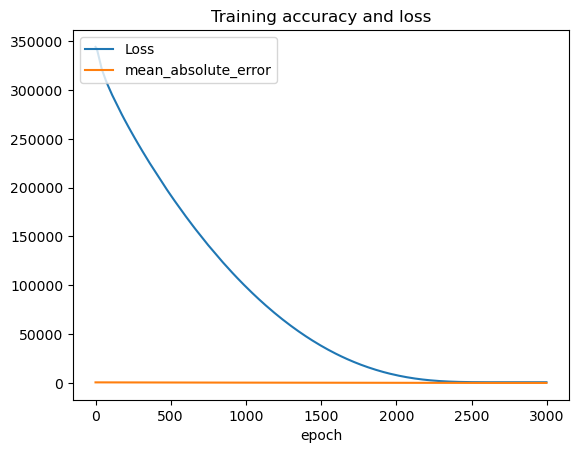

In [137]:
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.title('Training accuracy and loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'mean_absolute_error'], loc='upper left')
plt.show()